# **Made By**


1.   Muhammad Jan ( janmuhammad2050@gmail.com )



# **All Required Imports (Libraries, Models, Methods etc...)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# **All Dataframes**

In [ ]:
df=pd.read_csv('The_Grades_Dataset.csv') # This dataframe will be used as a sample in many places.
                                         # It has nothing to do with models and predictions
df_nan_filled_with_column_mode=pd.read_csv('The_Grades_Dataset.csv') # This is the dataframe in which 
                                         # NaN values are filled with the Mode of the respective column 
df_nan_rows_eliminated=pd.read_csv('The_Grades_Dataset.csv') # This is a dataframe in which rows caontaining
                                        # NaN values are eliminated or droped

In [ ]:
df.head() # visualizing dataset

NameError: ignored

In [ ]:
df.isnull().sum() # Checking for null values in each column

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [ ]:
# Seat no and courses of 4th year has nothing to do with our work. 
# Therefore, I'm dropping them
df.drop(['Seat No.','CS-403','CS-421','CS-406'	,'CS-414'	,'CS-419'	,'CS-423'	,'CS-412'],inplace=True,axis=1)
df_nan_filled_with_column_mode.drop(['Seat No.','CS-403','CS-421','CS-406'	,'CS-414'	,'CS-419'	,'CS-423'	,'CS-412'],inplace=True,axis=1)
df_nan_rows_eliminated.drop(['Seat No.','CS-403','CS-421','CS-406'	,'CS-414'	,'CS-419'	,'CS-423'	,'CS-412'],inplace=True,axis=1)

In [ ]:
df.head() # Visualizing after dropping of unnecessary columns

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0     B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1      A      D     D+         D     B-      C      D      A     D+      D   
2      A      B      A        B-     B+      A     B-     B+     A-     A-   
3      D     C+     D+         D      D     A-     D+     C-      D     C+   
4     A-     A-     A-        B+      A      A     A-     B+      A     A-   

   ... CS-301 CS-302 TC-383 MT-442 EL-332 CS-318 CS-306 CS-312 CS-317   CGPA  
0  ...      B      C     C+     B+      C     C-      C     C-     C-  2.205  
1  ...     A-     D+     C-     C-      C     A-      D     D+      D  2.008  
2  ...     B+     A-      B      A     B+     A-     A-      B      B  3.608  
3  ...      D     B-     D+     C-     D+     B+     C-     D+      C  1.906  
4  ...     B-     A-     C+     A-     A-     B-     A-     B-     B+  3.448  

[5 rows x 35 columns]

In [ ]:
df.columns # Checking all columns of the dataset

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CGPA'],
      dtype='object')

In [ ]:
# Making a list of Categorical variables 
categorical_columns=[]
for i in df.columns:
  if df[i].dtype=="O": # Categorical variables have a data type object O
    categorical_columns.append(i)
categorical_columns

['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317']

In [ ]:
# Making a list of non-categorical columns
non_categorical_columns=[]
for i in df.columns:
  if df[i].dtype=='int64' or df[i].dtype=='float64': # non-categorical variables have a data type of int64 or float64
    non_categorical_columns.append(i)
non_categorical_columns

['CGPA']

# **Count Plot of Each Categorical Column**

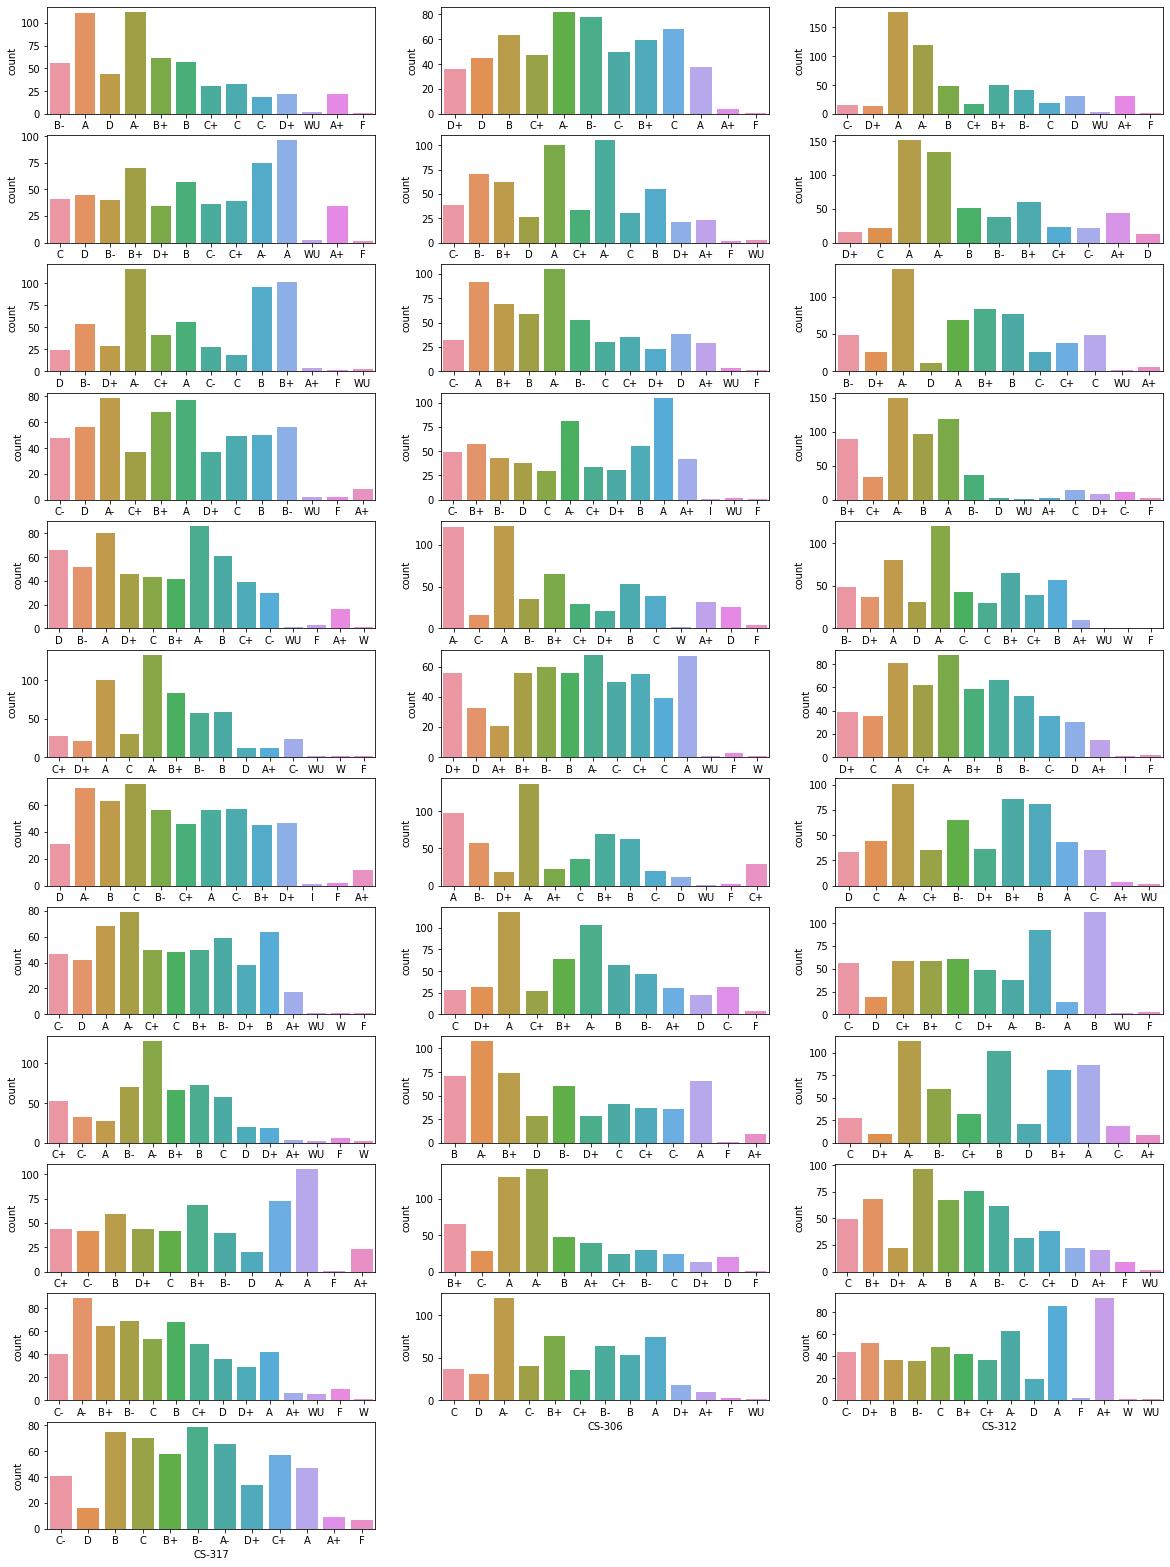

In [ ]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,28))
for i, j in enumerate(categorical_columns):
  plt.subplot(12, 3, i+1)
  sb.countplot(j,data=df_nan_filled_with_column_mode)

In [ ]:
for i in categorical_columns: # Checking values count of each column in dataframe
  print(df[i].value_counts())

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64
A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4


In [ ]:
# Filling every column with NaN value with its respective mode
for column in df_nan_filled_with_column_mode:
    if df_nan_filled_with_column_mode[column].isnull().any():
        if(column in categorical_columns): # This will ensure that only featues will be filled with mode not the target
# mode()[0] represents that the columns will be filled with a single mode because it may possible that a column may contain more than 1 mode
            df_nan_filled_with_column_mode[column]=df_nan_filled_with_column_mode[column].fillna(df_nan_filled_with_column_mode[column].mode()[0])

In [ ]:
df_nan_filled_with_column_mode.isnull().sum() # checking whether NaN values are addressed or not

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CGPA         0
dtype: int64

In [ ]:
# Visualizing columns with differnet aspects like datatype, null or not etc
df_nan_filled_with_column_mode.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-212    

In [ ]:
# Visualizing different statistical quantities, min, max, distribution etc of dataset
for i in df_nan_filled_with_column_mode:
  df_nan_filled_with_column_mode.describe()

In [ ]:
# Dropping all rows having atleast 1 NaN entry
df_nan_rows_eliminated=df_nan_rows_eliminated.dropna() 

In [ ]:
# Confirming whether NaN values has been addressed or not
df_nan_rows_eliminated.isnull().sum() 

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CGPA         0
dtype: int64

In [ ]:
# Visualizing columns with differnet aspects like datatype, null or not etc
df_nan_rows_eliminated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 570
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     559 non-null    object 
 1   HS-101     559 non-null    object 
 2   CY-105     559 non-null    object 
 3   HS-105/12  559 non-null    object 
 4   MT-111     559 non-null    object 
 5   CS-105     559 non-null    object 
 6   CS-106     559 non-null    object 
 7   EL-102     559 non-null    object 
 8   EE-119     559 non-null    object 
 9   ME-107     559 non-null    object 
 10  CS-107     559 non-null    object 
 11  HS-205/20  559 non-null    object 
 12  MT-222     559 non-null    object 
 13  EE-222     559 non-null    object 
 14  MT-224     559 non-null    object 
 15  CS-210     559 non-null    object 
 16  CS-211     559 non-null    object 
 17  CS-203     559 non-null    object 
 18  CS-214     559 non-null    object 
 19  EE-217     559 non-null    object 
 20  CS-212    

In [ ]:
# Visualizing different statistical quantities, min, max, distribution etc of dataset
df_nan_rows_eliminated.describe()

CGPA
count  559.000000
mean     2.978309
std      0.592862
min      1.261000
25%      2.565000
50%      3.042000
75%      3.455000
max      3.985000

In [ ]:
# It may possible that some rows of the datasets after addressing the NaN values becomes same/equal
# This sholud be addressed because it will/may cause the models to underfit 
df_nan_filled_with_column_mode.drop_duplicates()
df_nan_rows_eliminated.drop_duplicates()

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0       B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1        A      D     D+         D     B-      C      D      A     D+      D   
2        A      B      A        B-     B+      A     B-     B+     A-     A-   
3        D     C+     D+         D      D     A-     D+     C-      D     C+   
4       A-     A-     A-        B+      A      A     A-     B+      A     A-   
..     ...    ...    ...       ...    ...    ...    ...    ...    ...    ...   
566      B      A      A        A-     A+      A     A-     A-     A+     B+   
567     A+      A      A         A      A      A      A     A-      A      A   
568      B      A     A-        B+      A      A      A      A      A      B   
569      A     B+      D         A      D     D+     B-     C-     B-     C-   
570      C      D      D         C      C     D+      B     C+      C     D+   

     ... CS-301 CS-302 TC-383 MT-442 EL-332 CS-318 CS-306 CS-312 CS-317   CGPA  
0    ...      B      C     C+     B+      C     C-      C     C-     C-  2.205  
1    ...     A-     D+     C-     C-      C     A-      D     D+      D  2.008  
2    ...     B+     A-      B      A     B+     A-     A-      B      B  3.608  
3    ...      D     B-     D+     C-     D+     B+     C-     D+      C  1.906  
4    ...     B-     A-     C+     A-     A-     B-     A-     B-     B+  3.448  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
566  ...     A-      A     A+     A+      A      A     B+     A-     A-  3.798  
567  ...      A      A      A     A+      A     A+     A-     B+     B+  3.772  
568  ...     B+     B+      A     B+      B     C+     B+     A-      B  3.470  
569  ...      C     C+     C-     C-      D     B-     B+      D      B  2.193  
570  ...      D      D      C     A-      F     C-     D+     C+      C  1.753  

[559 rows x 35 columns]

In [ ]:
# These are the possible grades dataset may contain
grades=['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','F','P','IP','X','I','W','WU']

# **Margin of grades**
This image is taken from the prospectus of NED University of Engineering and Technology

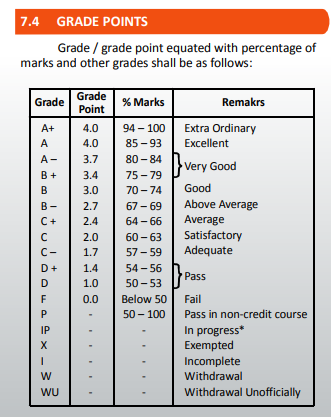

In [ ]:
grade_margin={'A+':4.0,
              'A':4.0,
              'A-':3.7,
              'B+':3.4,
              'B':3.0,
              'B-':2.7,
              'C+':2.4,
              'C':2.0,
              'C-':1.7,
              'D+':1.4,
              'D':1,
              'F':0.0,
              'P':0.0,
              'IP':0.0,
              'X':0.0,
              'I':0.0,
              'W':0.0,
              'WU':0.0}

In [ ]:
# Mapping all the columns with the Margin of each grade described above
for i in df[categorical_columns]: # This is a sample dataset we are showing some results usimg it to save space. It is not been used for prediction or visualization
  df[i]=df[i].map(grade_margin)
for i in df_nan_filled_with_column_mode[categorical_columns]:
  df_nan_filled_with_column_mode[i]=df_nan_filled_with_column_mode[i].map(grade_margin)
for i in df_nan_rows_eliminated[categorical_columns]:
  df_nan_rows_eliminated[i]=df_nan_rows_eliminated[i].map(grade_margin)

NameError: ignored

In [ ]:
df.head()

# **Scatter Plot of df_nan_filled_with_column_mode:**

In [ ]:
plt.figure(figsize=(50,25))
plt.title('Scatter Plot of all features with target',fontsize=30)
plt.xlabel('Features',fontsize=30)
plt.ylabel('Target (CGPA)',fontsize=30)
for i in df_nan_filled_with_column_mode[categorical_columns]:
  plt.scatter(df_nan_filled_with_column_mode[i],df_nan_filled_with_column_mode['CGPA'])

# **Scatter Plot of df_nan_rows_eliminated:**

In [ ]:
plt.figure(figsize=(50,20))
plt.title('Scatter Plot of all features with target',fontsize=30)
plt.xlabel('Features',fontsize=30)
plt.ylabel('Target (CGPA)',fontsize=30)
for i in df_nan_rows_eliminated[categorical_columns]:
  plt.scatter(df_nan_rows_eliminated[i],df_nan_rows_eliminated['CGPA'])

# **Corelation plot of every column of df_nan_filled_with_column_mode with target**

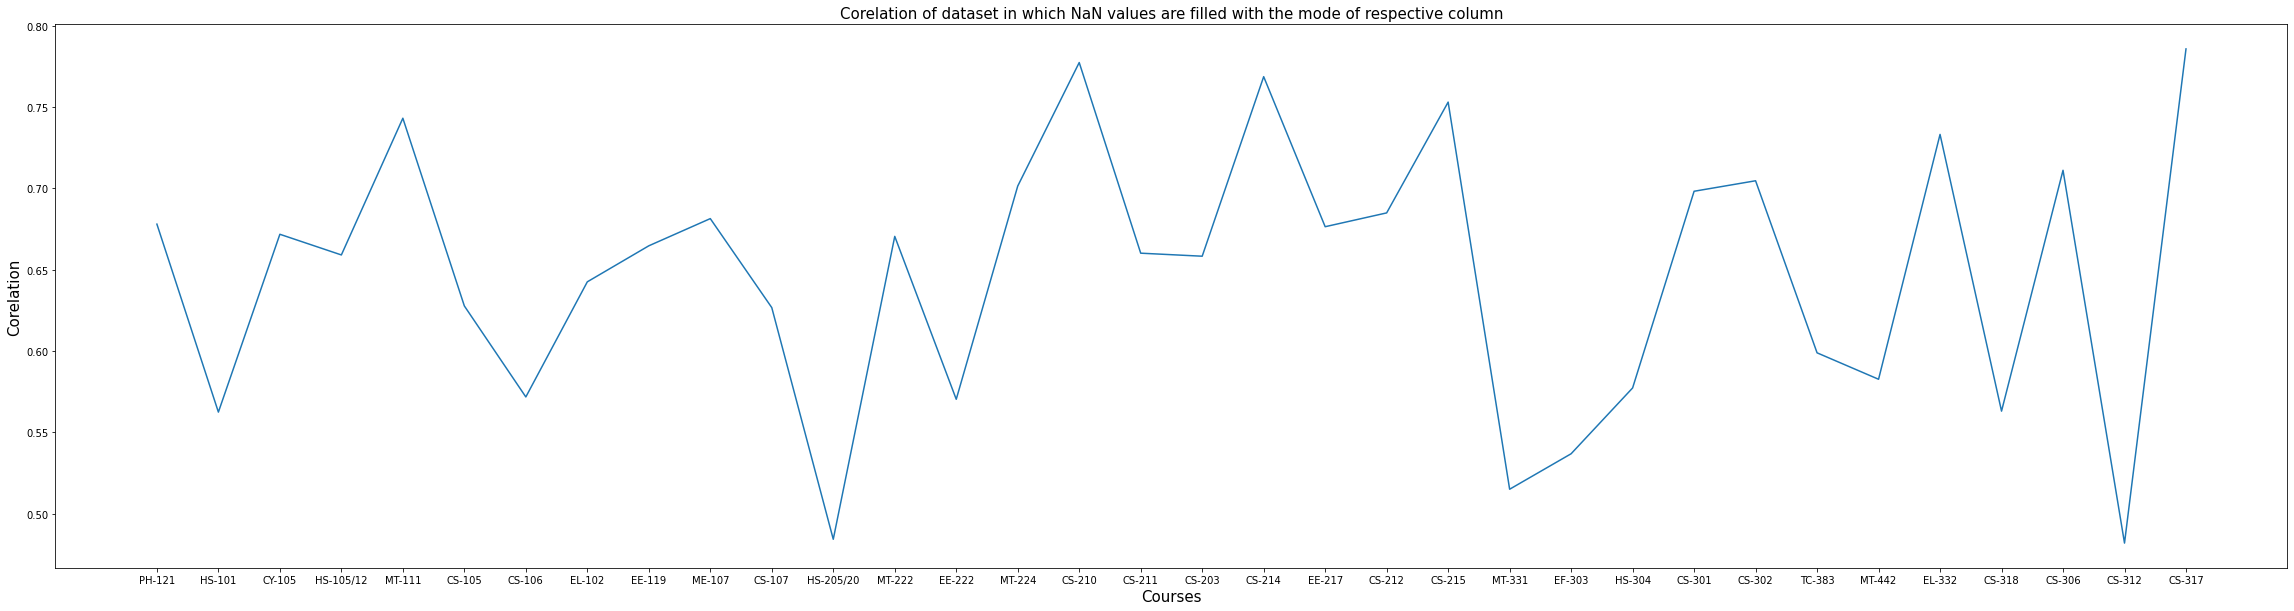

In [ ]:
corelation_filled_column_mode=df_nan_filled_with_column_mode[categorical_columns].corrwith(df["CGPA"])
corelation_filled_column_mode.tolist()
plt.figure(figsize=(40,10))
plt.title('Corelation of dataset in which NaN values are filled with the mode of respective column',fontsize=15)
plt.xlabel("Courses",fontsize=15)
plt.ylabel("Corelation",fontsize=15)
plt.plot(corelation_filled_column_mode)

# **Corelation plot of every column of df_nan_rows_eliminated with target**

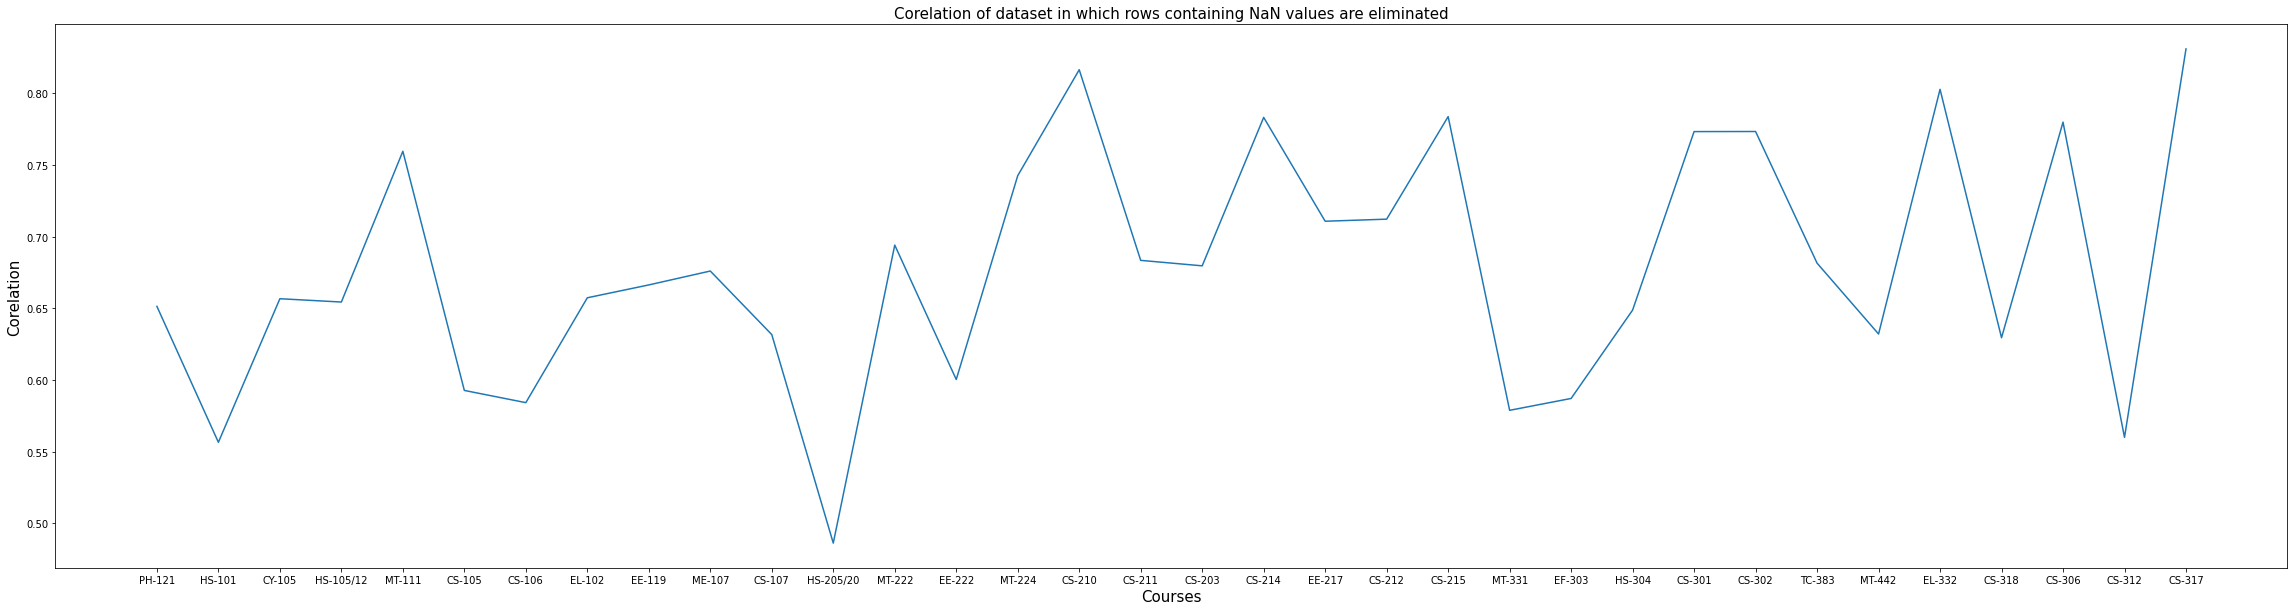

In [ ]:
corelation_rows_eliminated=df_nan_rows_eliminated[categorical_columns].corrwith(df["CGPA"])
corelation_rows_eliminated.tolist()
plt.figure(figsize=(40,10))
plt.title('Corelation of dataset in which rows containing NaN values are eliminated',fontsize=15)
plt.xlabel("Courses",fontsize=15)
plt.ylabel("Corelation",fontsize=15)
plt.plot(corelation_rows_eliminated)

# **Visualizing Each Categorical Column against CGPA**

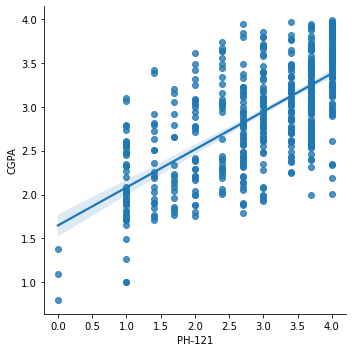

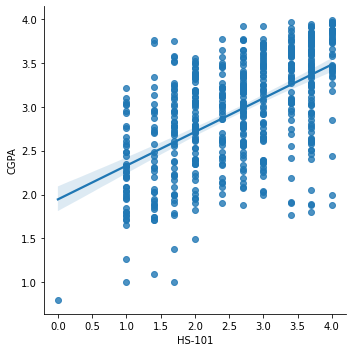

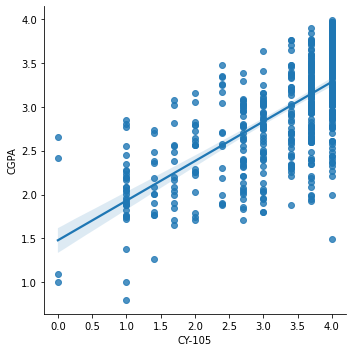

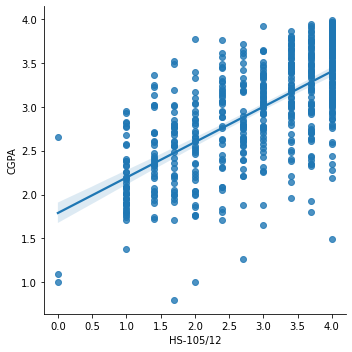

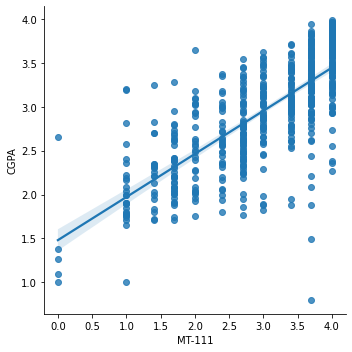

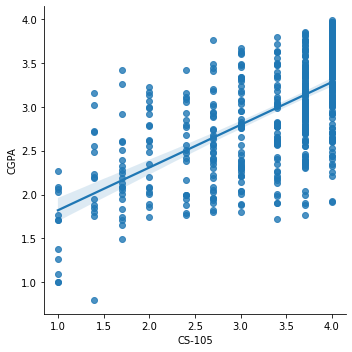

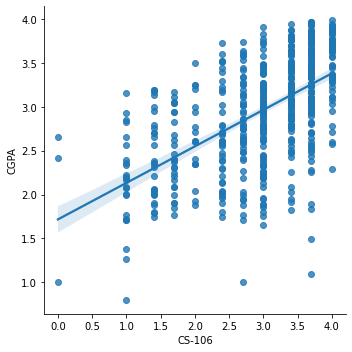

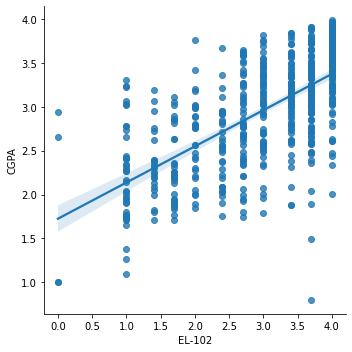

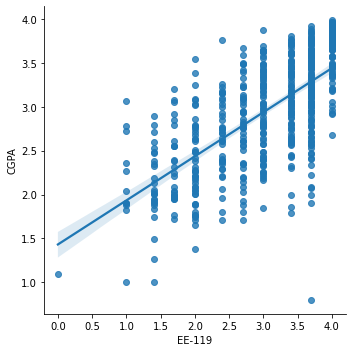

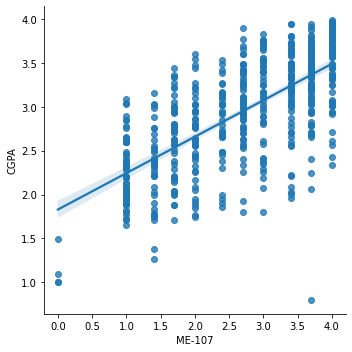

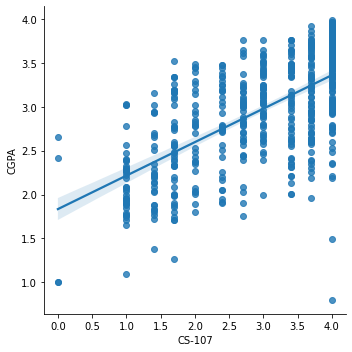

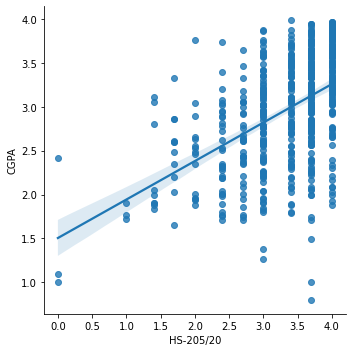

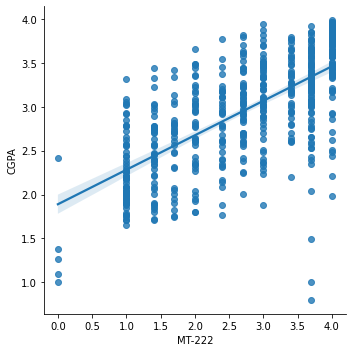

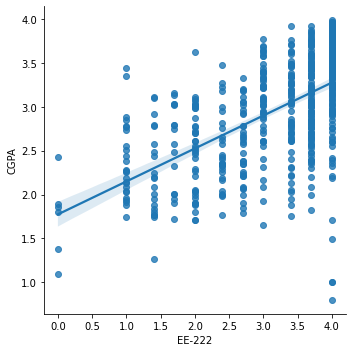

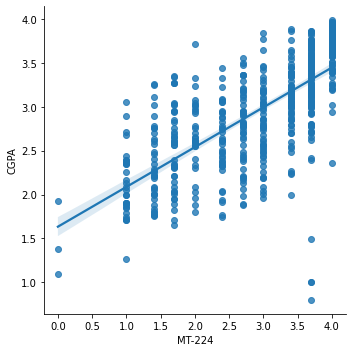

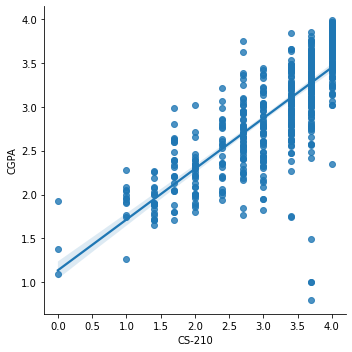

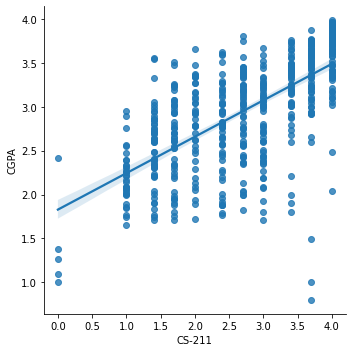

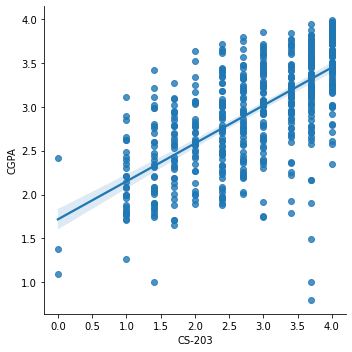

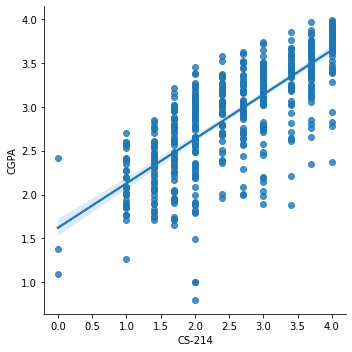

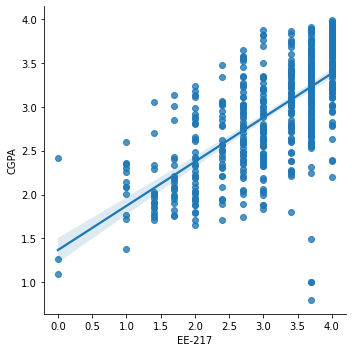

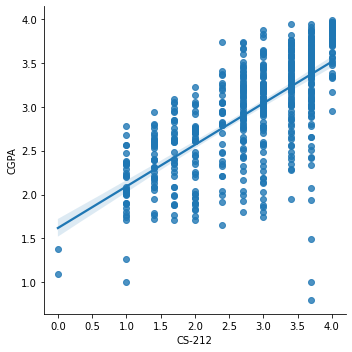

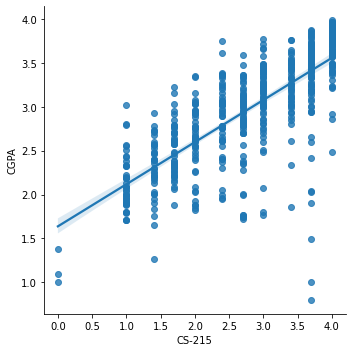

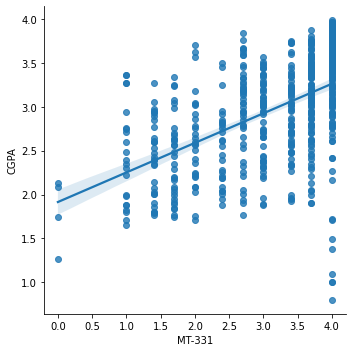

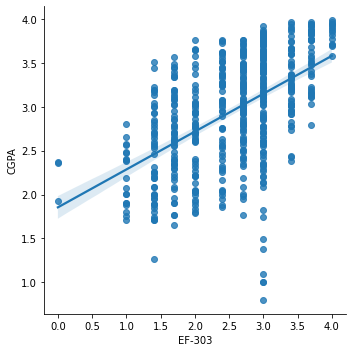

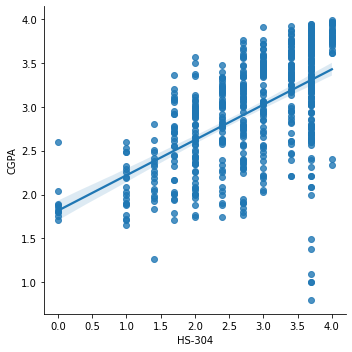

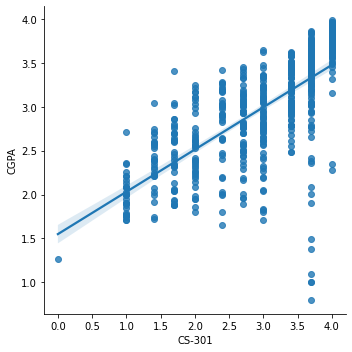

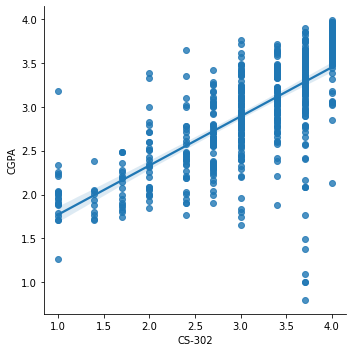

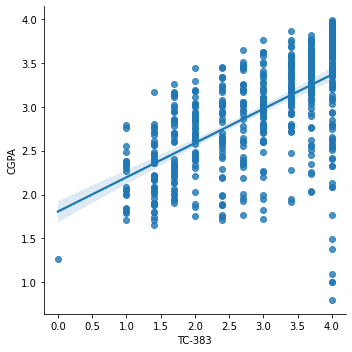

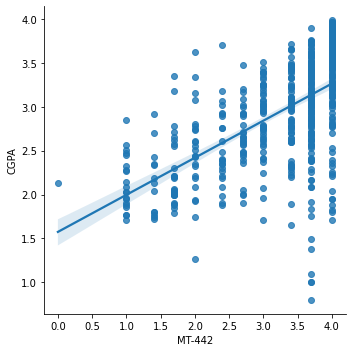

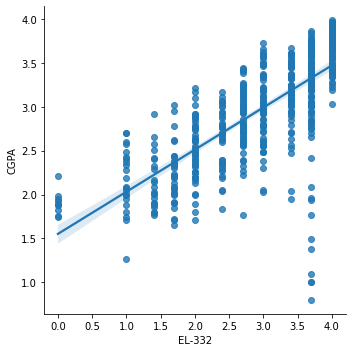

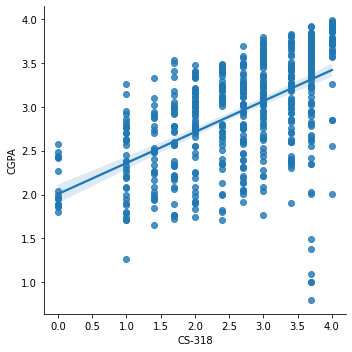

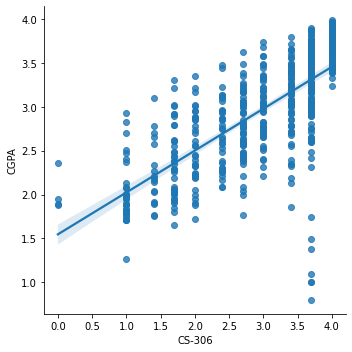

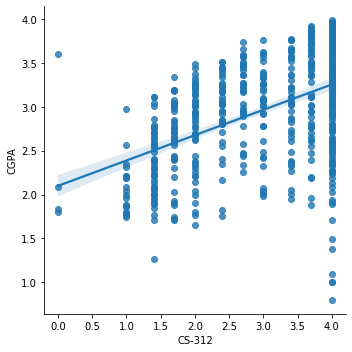

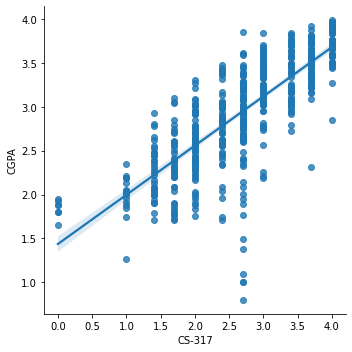

In [ ]:
warnings.filterwarnings('ignore')
for i in categorical_columns:
  sb.lmplot(x=i,y='CGPA',data=df_nan_filled_with_column_mode)

In [ ]:
# Courses list year wise. Although we can use iloc method to do the same thing 
first_year_courses=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107'] 
second_year_courses=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215']
third_year_courses=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317']

In [ ]:
x_first_year_column_mode=df_nan_filled_with_column_mode[first_year_courses]
x_second_year_column_mode=df_nan_filled_with_column_mode[second_year_courses]
x_third_year_column_mode=df_nan_filled_with_column_mode[third_year_courses]
x_first_year_rows_eliminated=df_nan_rows_eliminated[first_year_courses]
x_second_year_rows_eliminated=df_nan_rows_eliminated[second_year_courses]
x_third_year_rows_eliminated=df_nan_rows_eliminated[third_year_courses]

In [ ]:
y=df_nan_filled_with_column_mode['CGPA'] # This will be used as target for df_nan_filled_with_column_mode and df_nan_filled_with_zeros
y_rows_eliminated=df_nan_rows_eliminated['CGPA'] # This will be used as a target for df_nan_rows_eliminated because it has less number of elements than above's models

# **Making object of all model classes**

In [ ]:
# Syntax: model_x where x represents the year. we have done it because if we fit data of all three years on the same models then it will cause model to underfit b/c 
# each model will see the pattern of first year courses atleast 3 times 
LR_1=LinearRegression()
LR_2=LinearRegression()
LR_3=LinearRegression()
SVR_1=SVR(kernel='rbf')
SVR_2=SVR(kernel='rbf')
SVR_3=SVR(kernel='rbf')
RF_1=RandomForestRegressor(n_estimators=100,  criterion='squared_error', max_depth=8, min_samples_split=2) 
RF_2=RandomForestRegressor(n_estimators=100,  criterion='squared_error', max_depth=8, min_samples_split=2) 
RF_3=RandomForestRegressor(n_estimators=100,  criterion='squared_error', max_depth=8, min_samples_split=2) 
LR_1_row_eliminated=LinearRegression()
LR_2_row_eliminated=LinearRegression()
LR_3_row_eliminated=LinearRegression()
SVR_1_row_eliminated=SVR(kernel='rbf')
SVR_2_row_eliminated=SVR(kernel='rbf')
SVR_3_row_eliminated=SVR(kernel='rbf')
RF_1_row_eliminated=RandomForestRegressor(n_estimators=100,  criterion='squared_error', max_depth=8, min_samples_split=2) 
RF_2_row_eliminated=RandomForestRegressor(n_estimators=100,  criterion='squared_error', max_depth=8, min_samples_split=2) 
RF_3_row_eliminated=RandomForestRegressor(n_estimators=100,  criterion='squared_error', max_depth=8, min_samples_split=2) 

In [ ]:
x_1_mode_train,x_1_mode_test,y_1_mode_train,y_1_mode_test=train_test_split(x_first_year_column_mode,y,test_size=0.2,random_state=1538)
x_2_mode_train,x_2_mode_test,y_2_mode_train,y_2_mode_test=train_test_split(x_second_year_column_mode,y,test_size=0.2,random_state=1538)
x_3_mode_train,x_3_mode_test,y_3_mode_train,y_3_mode_test=train_test_split(x_third_year_column_mode,y,test_size=0.2,random_state=1538)
x_1_row_eliminated_train,x_1_row_eliminated_test,y_1_row_eliminated_train,y_1_row_eliminated_test=train_test_split(x_first_year_rows_eliminated,y_rows_eliminated,test_size=0.2,random_state=1538)
x_2_row_eliminated_train,x_2_row_eliminated_test,y_2_row_eliminated_train,y_2_row_eliminated_test=train_test_split(x_second_year_rows_eliminated,y_rows_eliminated,test_size=0.2,random_state=1538)
x_3_row_eliminated_train,x_3_row_eliminated_test,y_3_row_eliminated_train,y_3_row_eliminated_test=train_test_split(x_third_year_rows_eliminated,y_rows_eliminated,test_size=0.2,random_state=1538)

< ==================================================================================================== >
< ======================================== Linear Regression on First Year data, NaN filled with mode ======================================== >
< ==================================================================================================== >
Coefficient of linear regression are: [0.05622283 0.07073466 0.03559624 0.0613147  0.11883524 0.05233209
 0.10836766 0.09572441 0.0917204  0.12865072 0.02467797]
Intercept of linear regression is: 0.4613721319822499
Training score of Linear Regression with first courses is: 80.77212516282928 %
Test score of Linear Regression with first year courses is: 91.50846736897932 %
R2 Metric of Linear Regression with first year courses is: 91.50846736897932 %
Adjusted-R2 of Linear Regression with first year courses is: 91.34137102024724 %
Mean Squared Error of Linear Regression with first year courses is:  4.0700632502365535 %
Mean Absolute Error 

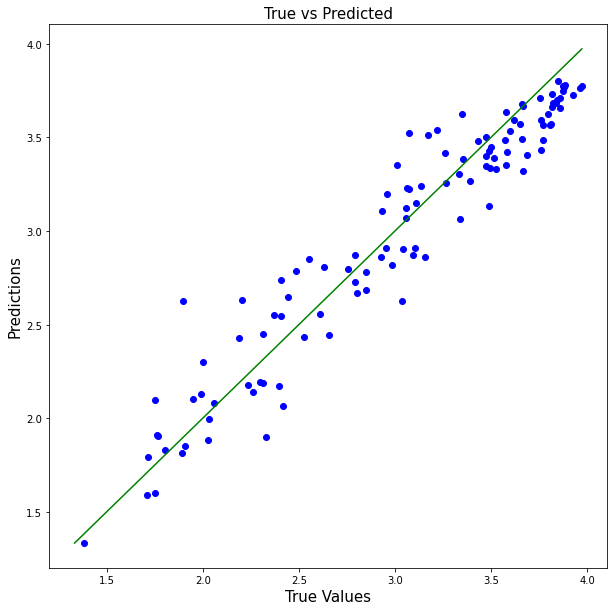

In [ ]:
# Linear regression with first year courses
LR_1.fit(x_1_mode_train,y_1_mode_train)
train_score_1_mode_LR=LR_1.score(x_1_mode_train,y_1_mode_train)
test_score_1_mode_LR=LR_1.score(x_1_mode_test,y_1_mode_test)
y_1_mode_predict_LR=LR_1.predict(x_1_mode_test)
r2_scr_1_mode_LR=r2_score(y_1_mode_test,y_1_mode_predict_LR)
adj_r2_1_mode_LR = 1 - ((1 - r2_scr_1_mode_LR) * (len(x_first_year_column_mode) - 1) / (len(x_first_year_column_mode) - len(x_first_year_column_mode.columns) - 1))
mse_1_mode_LR=mean_squared_error(y_1_mode_test, y_1_mode_predict_LR)
mae_1_mode_LR=mean_absolute_error(y_1_mode_test, y_1_mode_predict_LR)
print("<","="*100,">")
print("<","="*40,"Linear Regression on First Year data, NaN filled with mode","="*40,">")
print("<","="*100,">")
print("Coefficient of linear regression are:",LR_1.coef_)
print("Intercept of linear regression is:",LR_1.intercept_)
print("Training score of Linear Regression with first courses is:",train_score_1_mode_LR*100,"%")
print("Test score of Linear Regression with first year courses is:",test_score_1_mode_LR*100,"%")
print("R2 Metric of Linear Regression with first year courses is:",r2_scr_1_mode_LR*100,"%")
print("Adjusted-R2 of Linear Regression with first year courses is:",adj_r2_1_mode_LR*100,"%")
print("Mean Squared Error of Linear Regression with first year courses is: ",mse_1_mode_LR*100,"%")
print("Mean Absolute Error of Linear Regression with first year courses is: ",mae_1_mode_LR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_1_mode_test,y_1_mode_predict_LR,c='Blue')
p1 = max(max(y_1_mode_predict_LR), max(y_1_mode_test))
p2 = min(min(y_1_mode_predict_LR), min(y_1_mode_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Linear Regression on Second Year data, NaN filled with mode ======================================== >
< ==================================================================================================== >
Coefficient of linear regression are: [ 0.07251833  0.05336876  0.0223462   0.03173722  0.03224936  0.0703173
  0.07829001  0.03787334  0.04166639  0.04304782  0.0308839   0.04715581
 -0.01067084  0.01275461  0.08537965  0.11014958  0.0318873   0.0009131
  0.07514976  0.03377992  0.01254582  0.02495714]
Intercept of linear regression is: 0.15166092769258643
Training score of Linear Regression with second courses is: 89.35738544862993 %
Test score of Linear Regression with second year courses is: 95.0601516691943 %
R2 Metric of Linear Regression with second year courses is: 95.0601516691943 %
Adjusted-R2 of Linear Regression with second 

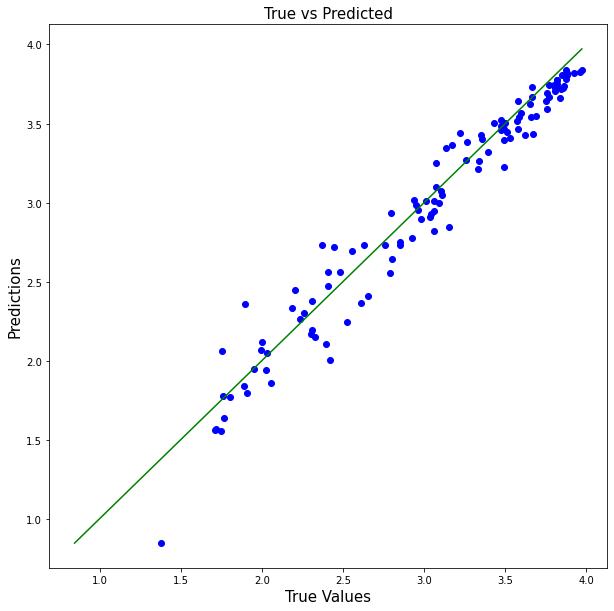

In [ ]:
# Linear regression with second year courses
LR_2.fit(x_2_mode_train,y_2_mode_train)
train_score_2_mode_LR=LR_2.score(x_2_mode_train,y_2_mode_train)
test_score_2_mode_LR=LR_2.score(x_2_mode_test,y_2_mode_test)
y_2_mode_predict_LR=LR_2.predict(x_2_mode_test)
r2_scr_2_mode_LR=r2_score(y_2_mode_test,y_2_mode_predict_LR)
adj_r2_2_mode_LR = 1 - ((1 - r2_scr_2_mode_LR) * (len(x_second_year_column_mode) - 1) / (len(x_second_year_column_mode) - len(x_second_year_column_mode.columns) - 1))
mse_2_mode_LR=mean_squared_error(y_2_mode_test, y_2_mode_predict_LR)
mae_2_mode_LR=mean_absolute_error(y_2_mode_test, y_2_mode_predict_LR)
print("<","="*100,">")
print("<","="*40,"Linear Regression on Second Year data, NaN filled with mode","="*40,">")
print("<","="*100,">")
print("Coefficient of linear regression are:",LR_2.coef_)
print("Intercept of linear regression is:",LR_2.intercept_)
print("Training score of Linear Regression with second courses is:",train_score_2_mode_LR*100,"%")
print("Test score of Linear Regression with second year courses is:",test_score_2_mode_LR*100,"%")
print("R2 Metric of Linear Regression with second year courses is:",r2_scr_2_mode_LR*100,"%")
print("Adjusted-R2 of Linear Regression with second year courses is:",adj_r2_2_mode_LR*100,"%")
print("Mean Squared Error of Linear Regression with second year courses is: ",mse_2_mode_LR*100,"%")
print("Mean Absolute Error of Linear Regression with second year courses is: ",mae_2_mode_LR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_2_mode_test,y_2_mode_predict_LR,c='Blue')
p1 = max(max(y_2_mode_predict_LR), max(y_2_mode_test))
p2 = min(min(y_2_mode_predict_LR), min(y_2_mode_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Linear Regression on Third Year data, NaN filled with mode ======================================== >
< ==================================================================================================== >
Coefficient of linear regression are: [ 0.07736476  0.05092553  0.03224408  0.01930855  0.01478634  0.08124085
  0.05448991  0.04320859  0.03237757  0.04894617  0.01971182  0.05722423
 -0.00728257 -0.01022751  0.02598198  0.02617762  0.0091972   0.00070755
  0.05517017  0.03544975 -0.01409984  0.02348047  0.02767113  0.02588126
 -0.01432146  0.04149518  0.03186978  0.00665188  0.01181597  0.0491001
 -0.0020013   0.02689388  0.02580019  0.0796158 ]
Intercept of linear regression is: 0.02419278174793993
Training score of Linear Regression with third courses is: 92.74311412134732 %
Test score of Linear Regression with third year courses is:

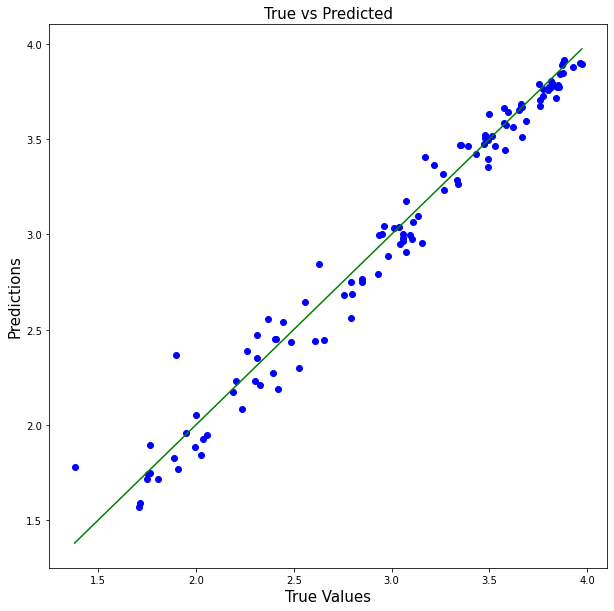

In [ ]:
# Linear regression with third year courses
LR_3.fit(x_3_mode_train,y_3_mode_train)
train_score_3_mode_LR=LR_3.score(x_3_mode_train,y_3_mode_train)
test_score_3_mode_LR=LR_3.score(x_3_mode_test,y_3_mode_test)
y_3_mode_predict_LR=LR_3.predict(x_3_mode_test)
r2_scr_3_mode_LR=r2_score(y_3_mode_test,y_3_mode_predict_LR)
adj_r2_3_mode_LR = 1 - ((1 - r2_scr_3_mode_LR) * (len(x_third_year_column_mode) - 1) / (len(x_third_year_column_mode) - len(x_third_year_column_mode.columns) - 1))
mse_3_mode_LR=mean_squared_error(y_2_mode_test, y_3_mode_predict_LR)
mae_3_mode_LR=mean_absolute_error(y_3_mode_test, y_3_mode_predict_LR)
print("<","="*100,">")
print("<","="*40,"Linear Regression on Third Year data, NaN filled with mode","="*40,">")
print("<","="*100,">")
print("Coefficient of linear regression are:",LR_3.coef_)
print("Intercept of linear regression is:",LR_3.intercept_)
print("Training score of Linear Regression with third courses is:",train_score_3_mode_LR*100,"%")
print("Test score of Linear Regression with third year courses is:",test_score_3_mode_LR*100,"%")
print("R2 Metric of Linear Regression with third year courses is:",r2_scr_3_mode_LR*100,"%")
print("Adjusted-R2 of Linear Regression with third year courses is:",adj_r2_3_mode_LR*100,"%")
print("Mean Squared Error of Linear Regression third first year courses is: ",mse_3_mode_LR*100,"%")
print("Mean Absolute Error of Linear Regression third year courses is: ",mae_3_mode_LR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_3_mode_test,y_3_mode_predict_LR,c='Blue')
p1 = max(max(y_3_mode_predict_LR), max(y_3_mode_test))
p2 = min(min(y_3_mode_predict_LR), min(y_3_mode_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Random Forest on First Year data, NaN filled with mode ======================================== >
< ==================================================================================================== >
Training score of Random Forest with first courses is: 95.58804474261885 %
Test score of Random Forest with first year courses is: 90.89463900490846 %
R2 Metric of Random Forest with first year courses is: 90.89463900490846 %
Adjusted-R2 of Random Forest with first year courses is: 90.71546374382436 %
Mean Squared Error of Ramdon Forest with first year courses is:  4.364276365243726 %
Mean Absolute Error of Random Forest with first year courses is:  17.16943892019284 %


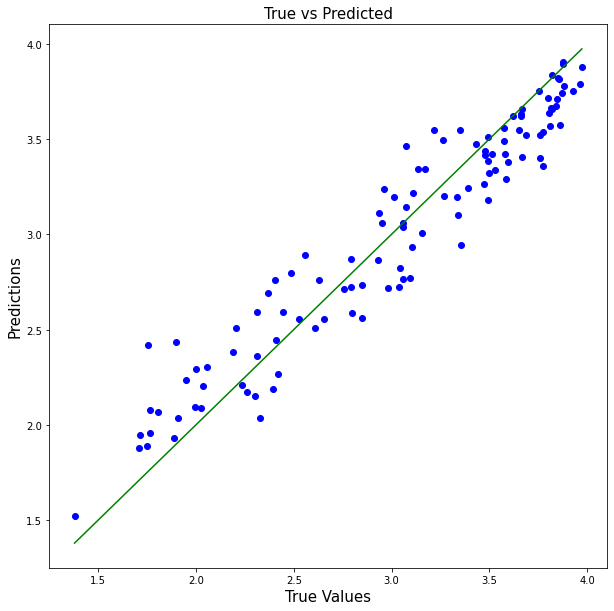

In [ ]:
# Random Forest with first year courses
RF_1.fit(x_1_mode_train,y_1_mode_train)
train_score_1_mode_RF=RF_1.score(x_1_mode_train,y_1_mode_train)
test_score_1_mode_RF=RF_1.score(x_1_mode_test,y_1_mode_test)
y_1_mode_predict_RF=RF_1.predict(x_1_mode_test)
r2_scr_1_mode_RF=r2_score(y_1_mode_test,y_1_mode_predict_RF)
adj_r2_1_mode_RF = 1 - ((1 - r2_scr_1_mode_RF) * (len(x_first_year_column_mode) - 1) / (len(x_first_year_column_mode) - len(x_first_year_column_mode.columns) - 1))
mse_1_mode_RF=mean_squared_error(y_1_mode_test, y_1_mode_predict_RF)
mae_1_mode_RF=mean_absolute_error(y_1_mode_test, y_1_mode_predict_RF)
print("<","="*100,">")
print("<","="*40,"Random Forest on First Year data, NaN filled with mode","="*40,">")
print("<","="*100,">")
print("Training score of Random Forest with first courses is:",train_score_1_mode_RF*100,"%")
print("Test score of Random Forest with first year courses is:",test_score_1_mode_RF*100,"%")
print("R2 Metric of Random Forest with first year courses is:",r2_scr_1_mode_RF*100,"%")
print("Adjusted-R2 of Random Forest with first year courses is:",adj_r2_1_mode_RF*100,"%")
print("Mean Squared Error of Ramdon Forest with first year courses is: ",mse_1_mode_RF*100,"%")
print("Mean Absolute Error of Random Forest with first year courses is: ",mae_1_mode_RF*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_1_mode_test,y_1_mode_predict_RF,c='Blue')
p1 = max(max(y_1_mode_predict_RF), max(y_1_mode_test))
p2 = min(min(y_1_mode_predict_RF), min(y_1_mode_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Random Forest on Second Year data, NaN filled with mode ======================================== >
< ==================================================================================================== >
Training score of Random Forest with second courses is: 97.61421006825526 %
Test score of Random Forest with second year courses is: 94.67808582560644 %
R2 Metric of Random Forest with second year courses is: 94.67808582560644 %
Adjusted-R2 of Random Forest with second year courses is: 94.46443233685342 %
Mean Squared Error of Random Forest with second year courses is:  2.550838375511091 %
Mean Absolute Error of Random Forest with second year courses is:  13.166338154590568 %


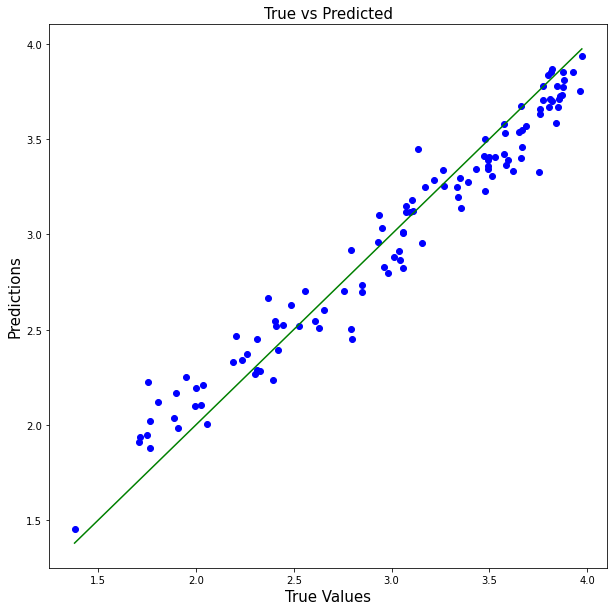

In [ ]:
# Random Forest with second year courses
RF_2.fit(x_2_mode_train,y_2_mode_train)
train_score_2_mode_RF=RF_2.score(x_2_mode_train,y_2_mode_train)
test_score_2_mode_RF=RF_2.score(x_2_mode_test,y_2_mode_test)
y_2_mode_predict_RF=RF_2.predict(x_2_mode_test)
r2_scr_2_mode_RF=r2_score(y_2_mode_test,y_2_mode_predict_RF)
adj_r2_2_mode_RF = 1 - ((1 - r2_scr_2_mode_RF) * (len(x_second_year_column_mode) - 1) / (len(x_second_year_column_mode) - len(x_second_year_column_mode.columns) - 1))
mse_2_mode_RF=mean_squared_error(y_2_mode_test, y_2_mode_predict_RF)
mae_2_mode_RF=mean_absolute_error(y_2_mode_test, y_2_mode_predict_RF)
print("<","="*100,">")
print("<","="*40,"Random Forest on Second Year data, NaN filled with mode","="*40,">")
print("<","="*100,">")
print("Training score of Random Forest with second courses is:",train_score_2_mode_RF*100,"%")
print("Test score of Random Forest with second year courses is:",test_score_2_mode_RF*100,"%")
print("R2 Metric of Random Forest with second year courses is:",r2_scr_2_mode_RF*100,"%")
print("Adjusted-R2 of Random Forest with second year courses is:",adj_r2_2_mode_RF*100,"%")
print("Mean Squared Error of Random Forest with second year courses is: ",mse_2_mode_RF*100,"%")
print("Mean Absolute Error of Random Forest with second year courses is: ",mae_2_mode_RF*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_2_mode_test,y_2_mode_predict_RF,c='Blue')
p1 = max(max(y_2_mode_predict_RF), max(y_2_mode_test))
p2 = min(min(y_2_mode_predict_RF), min(y_2_mode_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Random Forest on Third Year data, NaN filled with mode ======================================== >
< ==================================================================================================== >
Training score of Random Forest with third courses is: 98.58031888857516 %
Test score of Random Forest with third year courses is: 95.48542676790782 %
R2 Metric of Random Forest with third year courses is: 95.48542676790782 %
Adjusted-R2 of Random Forest with third year courses is: 95.1990545852751 %
Mean Squared Error of Random Forest with third year courses is:  2.1638730487020954 %
Mean Absolute Error of Random Forest with third year courses is:  10.923374129407339 %


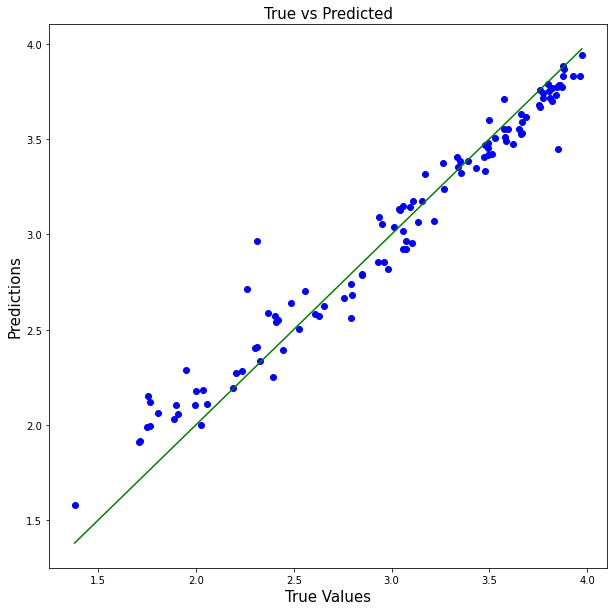

In [ ]:
# Random Forest with third year courses
RF_3.fit(x_3_mode_train,y_3_mode_train)
train_score_3_mode_RF=RF_3.score(x_3_mode_train,y_3_mode_train)
test_score_3_mode_RF=RF_3.score(x_3_mode_test,y_3_mode_test)
y_3_mode_predict_RF=RF_3.predict(x_3_mode_test)
r2_scr_3_mode_RF=r2_score(y_3_mode_test,y_3_mode_predict_RF)
adj_r2_3_mode_RF = 1 - ((1 - r2_scr_3_mode_RF) * (len(x_third_year_column_mode) - 1) / (len(x_third_year_column_mode) - len(x_third_year_column_mode.columns) - 1))
mse_3_mode_RF=mean_squared_error(y_2_mode_test, y_3_mode_predict_RF)
mae_3_mode_RF=mean_absolute_error(y_3_mode_test, y_3_mode_predict_RF)
print("<","="*100,">")
print("<","="*40,"Random Forest on Third Year data, NaN filled with mode","="*40,">")
print("<","="*100,">")
print("Training score of Random Forest with third courses is:",train_score_3_mode_RF*100,"%")
print("Test score of Random Forest with third year courses is:",test_score_3_mode_RF*100,"%")
print("R2 Metric of Random Forest with third year courses is:",r2_scr_3_mode_RF*100,"%")
print("Adjusted-R2 of Random Forest with third year courses is:",adj_r2_3_mode_RF*100,"%")
print("Mean Squared Error of Random Forest with third year courses is: ",mse_3_mode_RF*100,"%")
print("Mean Absolute Error of Random Forest with third year courses is: ",mae_3_mode_RF*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_3_mode_test,y_3_mode_predict_RF,c='Blue')
p1 = max(max(y_3_mode_predict_RF), max(y_3_mode_test))
p2 = min(min(y_3_mode_predict_RF), min(y_3_mode_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Suport Vector Regression on First Year data, NaN filled with mode ======================================== >
< ==================================================================================================== >
Training score of Suport Vector Regression with first courses is: 92.3033517821689 %
Test score of Suport Vector Regression with first year courses is: 91.91549662574286 %
R2 Metric of Suport Vector Regression with first year courses is: 91.91549662574286 %
Adjusted-R2 of Suport Vector Regression with first year courses is: 91.7564097972691 %
Mean Squared Error of Suport Vector Regression with first year courses is:  3.8749706925429694 %
Mean Absolute Error of Suport Vector Regression with first year courses is:  15.141109256584148 %


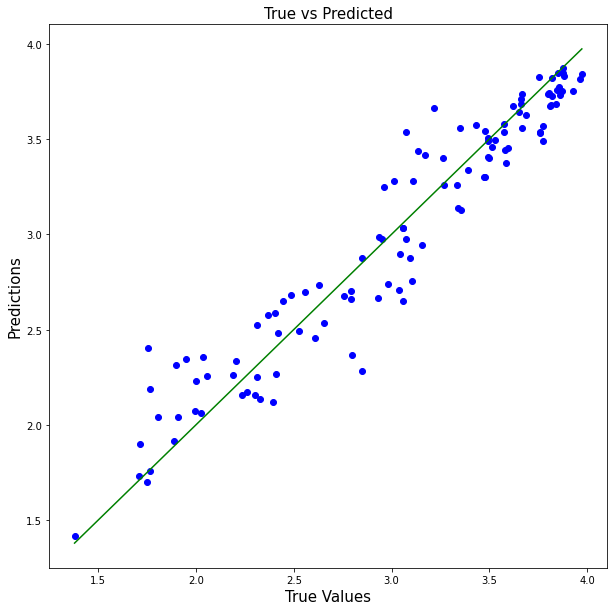

In [ ]:
# Suport Vector Regression with first year courses
SVR_1.fit(x_1_mode_train,y_1_mode_train)
train_score_1_mode_SVR=SVR_1.score(x_1_mode_train,y_1_mode_train)
test_score_1_mode_SVR=SVR_1.score(x_1_mode_test,y_1_mode_test)
y_1_mode_predict_SVR=SVR_1.predict(x_1_mode_test)
r2_scr_1_mode_SVR=r2_score(y_1_mode_test,y_1_mode_predict_SVR)
adj_r2_1_mode_SVR = 1 - ((1 - r2_scr_1_mode_SVR) * (len(x_first_year_column_mode) - 1) / (len(x_first_year_column_mode) - len(x_first_year_column_mode.columns) - 1))
mse_1_mode_SVR=mean_squared_error(y_1_mode_test, y_1_mode_predict_SVR)
mae_1_mode_SVR=mean_absolute_error(y_1_mode_test, y_1_mode_predict_SVR)
print("<","="*100,">")
print("<","="*40,"Suport Vector Regression on First Year data, NaN filled with mode","="*40,">")
print("<","="*100,">")
print("Training score of Suport Vector Regression with first courses is:",train_score_1_mode_SVR*100,"%")
print("Test score of Suport Vector Regression with first year courses is:",test_score_1_mode_SVR*100,"%")
print("R2 Metric of Suport Vector Regression with first year courses is:",r2_scr_1_mode_SVR*100,"%")
print("Adjusted-R2 of Suport Vector Regression with first year courses is:",adj_r2_1_mode_SVR*100,"%")
print("Mean Squared Error of Suport Vector Regression with first year courses is: ",mse_1_mode_SVR*100,"%")
print("Mean Absolute Error of Suport Vector Regression with first year courses is: ",mae_1_mode_SVR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_1_mode_test,y_1_mode_predict_SVR,c='Blue')
p1 = max(max(y_1_mode_predict_SVR), max(y_1_mode_test))
p2 = min(min(y_1_mode_predict_SVR), min(y_1_mode_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Support Vector Regression on Second Year data, NaN filled with mode ======================================== >
< ==================================================================================================== >
Training score of Support Vector Regression with second courses is: 96.7674885818257 %
Test score of Support Vector Regression with second year courses is: 96.0722227593846 %
R2 Metric of Support Vector Regression with second year courses is: 96.0722227593846 %
Adjusted-R2 of Support Vector Regression with second year courses is: 95.91453827162267 %
Mean Squared Error of Support Vector Regression with second year courses is:  1.8826167780059162 %
Mean Absolute Error of Support Vector Regression with second year courses is:  10.300459606487955 %


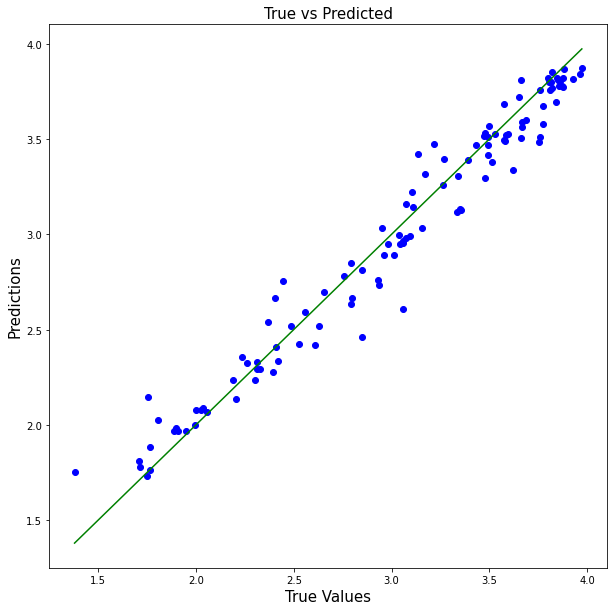

In [ ]:
# Support Vector Regression with second year courses
SVR_2.fit(x_2_mode_train,y_2_mode_train)
train_score_2_mode_SVR=SVR_2.score(x_2_mode_train,y_2_mode_train)
test_score_2_mode_SVR=SVR_2.score(x_2_mode_test,y_2_mode_test)
y_2_mode_predict_SVR=SVR_2.predict(x_2_mode_test)
r2_scr_2_mode_SVR=r2_score(y_2_mode_test,y_2_mode_predict_SVR)
adj_r2_2_mode_SVR = 1 - ((1 - r2_scr_2_mode_SVR) * (len(x_second_year_column_mode) - 1) / (len(x_second_year_column_mode) - len(x_second_year_column_mode.columns) - 1))
mse_2_mode_SVR=mean_squared_error(y_2_mode_test, y_2_mode_predict_SVR)
mae_2_mode_SVR=mean_absolute_error(y_2_mode_test, y_2_mode_predict_SVR)
print("<","="*100,">")
print("<","="*40,"Support Vector Regression on Second Year data, NaN filled with mode","="*40,">")
print("<","="*100,">")
print("Training score of Support Vector Regression with second courses is:",train_score_2_mode_SVR*100,"%")
print("Test score of Support Vector Regression with second year courses is:",test_score_2_mode_SVR*100,"%")
print("R2 Metric of Support Vector Regression with second year courses is:",r2_scr_2_mode_SVR*100,"%")
print("Adjusted-R2 of Support Vector Regression with second year courses is:",adj_r2_2_mode_SVR*100,"%")
print("Mean Squared Error of Support Vector Regression with second year courses is: ",mse_2_mode_SVR*100,"%")
print("Mean Absolute Error of Support Vector Regression with second year courses is: ",mae_2_mode_SVR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_2_mode_test,y_2_mode_predict_SVR,c='Blue')
p1 = max(max(y_2_mode_predict_SVR), max(y_2_mode_test))
p2 = min(min(y_2_mode_predict_SVR), min(y_2_mode_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Support Vector Regression on Third Year data, NaN filled with mode ======================================== >
< ==================================================================================================== >
Training score of Support Vector Regression with third courses is: 97.3695997123784 %
Test score of Support Vector Regression with third year courses is: 97.29667828995713 %
R2 Metric of Support Vector Regression with third year courses is: 97.29667828995713 %
Adjusted-R2 of Support Vector Regression with third year courses is: 97.12519892775292 %
Mean Squared Error of Support Vector Regression third first year courses is:  1.2957249090014518 %
Mean Absolute Error of Support Vector Regression third year courses is:  8.961344608616349 %


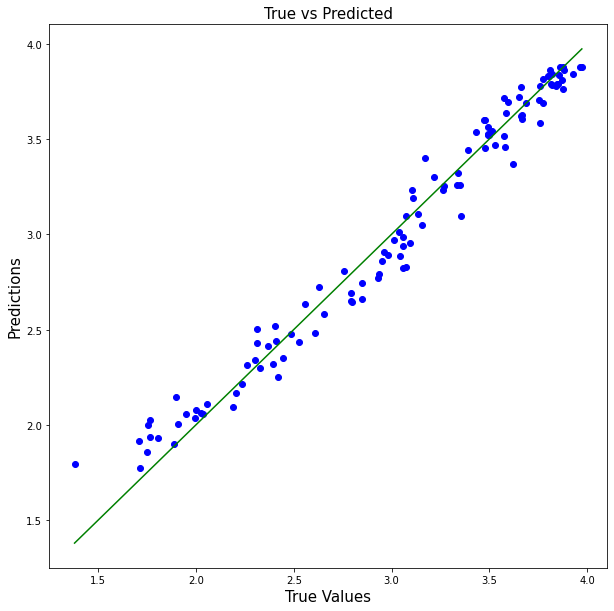

In [ ]:
# Support Vector Regression with third year courses
SVR_3.fit(x_3_mode_train,y_3_mode_train)
train_score_3_mode_SVR=SVR_3.score(x_3_mode_train,y_3_mode_train)
test_score_3_mode_SVR=SVR_3.score(x_3_mode_test,y_3_mode_test)
y_3_mode_predict_SVR=SVR_3.predict(x_3_mode_test)
r2_scr_3_mode_SVR=r2_score(y_3_mode_test,y_3_mode_predict_SVR)
adj_r2_3_mode_SVR = 1 - ((1 - r2_scr_3_mode_SVR) * (len(x_third_year_column_mode) - 1) / (len(x_third_year_column_mode) - len(x_third_year_column_mode.columns) - 1))
mse_3_mode_SVR=mean_squared_error(y_2_mode_test, y_3_mode_predict_SVR)
mae_3_mode_SVR=mean_absolute_error(y_3_mode_test, y_3_mode_predict_SVR)
print("<","="*100,">")
print("<","="*40,"Support Vector Regression on Third Year data, NaN filled with mode","="*40,">")
print("<","="*100,">")
print("Training score of Support Vector Regression with third courses is:",train_score_3_mode_SVR*100,"%")
print("Test score of Support Vector Regression with third year courses is:",test_score_3_mode_SVR*100,"%")
print("R2 Metric of Support Vector Regression with third year courses is:",r2_scr_3_mode_SVR*100,"%")
print("Adjusted-R2 of Support Vector Regression with third year courses is:",adj_r2_3_mode_SVR*100,"%")
print("Mean Squared Error of Support Vector Regression third first year courses is: ",mse_3_mode_SVR*100,"%")
print("Mean Absolute Error of Support Vector Regression third year courses is: ",mae_3_mode_SVR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_3_mode_test,y_3_mode_predict_SVR,c='Blue')
p1 = max(max(y_3_mode_predict_SVR), max(y_3_mode_test))
p2 = min(min(y_3_mode_predict_SVR), min(y_3_mode_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Linear Regression on First Year data, NaN rows eliminated ======================================== >
< ==================================================================================================== >
Coefficient of linear regression are: [0.02581318 0.04556489 0.02319565 0.0690113  0.16990781 0.03976938
 0.07538509 0.10880046 0.09103856 0.12365432 0.06230775]
Intercept of linear regression is: 0.5086108498602884
Training score of Linear Regression with first courses is: 85.68760894966276 %
Test score of Linear Regression with first year courses is: 84.50195437351215 %
R2 Metric of Linear Regression with first year courses is: 84.50195437351215 %
Adjusted-R2 of Linear Regression with first year courses is: 84.19029349254073 %
Mean Squared Error of Linear Regression with first year courses is:  5.251217185723264 %
Mean Absolute Error of

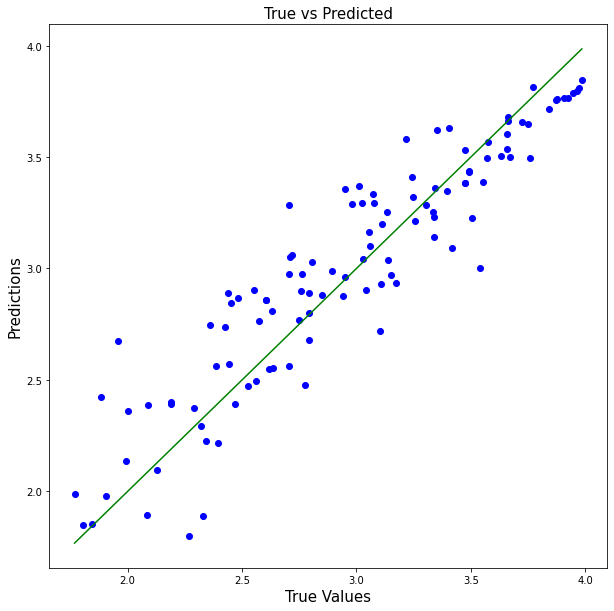

In [ ]:
# Linear regression with first year courses rows eliminated
LR_1_row_eliminated.fit(x_1_row_eliminated_train,y_1_row_eliminated_train)
train_score_1_row_eliminated_LR=LR_1_row_eliminated.score(x_1_row_eliminated_train,y_1_row_eliminated_train)
test_score_1_row_eliminated_LR=LR_1_row_eliminated.score(x_1_row_eliminated_test,y_1_row_eliminated_test)
y_1_row_eliminated_predict_LR=LR_1_row_eliminated.predict(x_1_row_eliminated_test)
r2_scr_1_row_eliminated_LR=r2_score(y_1_row_eliminated_test,y_1_row_eliminated_predict_LR)
adj_r2_1_row_eliminated_LR = 1 - ((1 - r2_scr_1_row_eliminated_LR) * (len(x_first_year_rows_eliminated) - 1) / (len(x_first_year_rows_eliminated) - len(x_first_year_rows_eliminated.columns) - 1))
mse_1_row_eliminated_LR=mean_squared_error(y_1_row_eliminated_test, y_1_row_eliminated_predict_LR)
mae_1_row_eliminated_LR=mean_absolute_error(y_1_row_eliminated_test, y_1_row_eliminated_predict_LR)
print("<","="*100,">")
print("<","="*40,"Linear Regression on First Year data, NaN rows eliminated","="*40,">")
print("<","="*100,">")
print("Coefficient of linear regression are:",LR_1_row_eliminated.coef_)
print("Intercept of linear regression is:",LR_1_row_eliminated.intercept_)
print("Training score of Linear Regression with first courses is:",train_score_1_row_eliminated_LR*100,"%")
print("Test score of Linear Regression with first year courses is:",test_score_1_row_eliminated_LR*100,"%")
print("R2 Metric of Linear Regression with first year courses is:",r2_scr_1_row_eliminated_LR*100,"%")
print("Adjusted-R2 of Linear Regression with first year courses is:",adj_r2_1_row_eliminated_LR*100,"%")
print("Mean Squared Error of Linear Regression with first year courses is: ",mse_1_row_eliminated_LR*100,"%")
print("Mean Absolute Error of Linear Regression with first year courses is: ",mae_1_row_eliminated_LR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_1_row_eliminated_test,y_1_row_eliminated_predict_LR,c='Blue')
p1 = max(max(y_1_row_eliminated_predict_LR), max(y_1_row_eliminated_test))
p2 = min(min(y_1_row_eliminated_predict_LR), min(y_1_row_eliminated_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Linear Regression on Second Year data, NaN rows eliminated ======================================== >
< ==================================================================================================== >
Coefficient of linear regression are: [0.01732872 0.03731978 0.00322616 0.04073981 0.05522363 0.03526678
 0.01946553 0.02015032 0.05151659 0.02219315 0.06333757 0.04826432
 0.01027641 0.05104596 0.10479503 0.10820208 0.03403021 0.02269829
 0.05558128 0.04031629 0.04044554 0.03155743]
Intercept of linear regression is: 0.26102229939221955
Training score of Linear Regression with second courses is: 94.95203200967242 %
Test score of Linear Regression with second year courses is: 94.22541792648994 %
R2 Metric of Linear Regression with second year courses is: 94.22541792648994 %
Adjusted-R2 of Linear Regression with second year courses is: 93

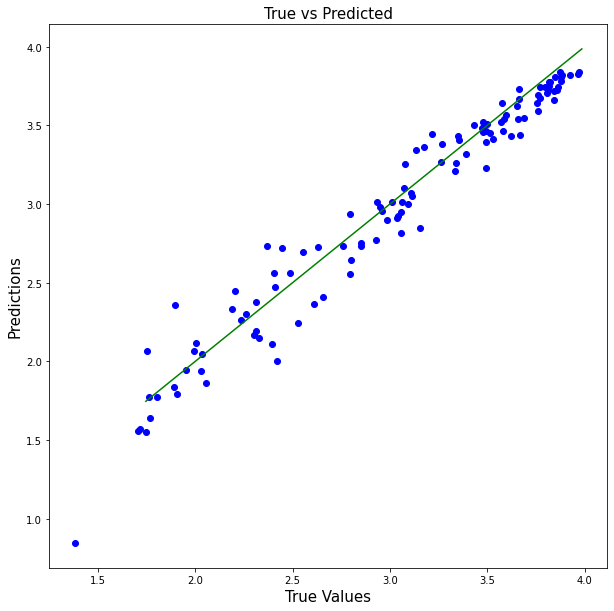

In [ ]:
# Linear regression with second year courses rows eliminated
LR_2_row_eliminated.fit(x_2_row_eliminated_train,y_2_row_eliminated_train)
train_score_2_row_eliminated_LR=LR_2_row_eliminated.score(x_2_row_eliminated_train,y_2_row_eliminated_train)
test_score_2_row_eliminated_LR=LR_2_row_eliminated.score(x_2_row_eliminated_test,y_2_row_eliminated_test)
y_2_row_eliminated_predict_LR=LR_2_row_eliminated.predict(x_2_row_eliminated_test)
r2_scr_2_row_eliminated_LR=r2_score(y_2_row_eliminated_test,y_2_row_eliminated_predict_LR)
adj_r2_2_row_eliminated_LR = 1 - ((1 - r2_scr_2_row_eliminated_LR) * (len(x_second_year_rows_eliminated) - 1) / (len(x_second_year_rows_eliminated) - len(x_second_year_rows_eliminated.columns) - 1))
mse_2_row_eliminated_LR=mean_squared_error(y_2_row_eliminated_test, y_2_row_eliminated_predict_LR)
mae_2_row_eliminated_LR=mean_absolute_error(y_2_row_eliminated_test, y_2_row_eliminated_predict_LR)
print("<","="*100,">")
print("<","="*40,"Linear Regression on Second Year data, NaN rows eliminated","="*40,">")
print("<","="*100,">")
print("Coefficient of linear regression are:",LR_2_row_eliminated.coef_)
print("Intercept of linear regression is:",LR_2_row_eliminated.intercept_)
print("Training score of Linear Regression with second courses is:",train_score_2_row_eliminated_LR*100,"%")
print("Test score of Linear Regression with second year courses is:",test_score_2_row_eliminated_LR*100,"%")
print("R2 Metric of Linear Regression with second year courses is:",r2_scr_2_row_eliminated_LR*100,"%")
print("Adjusted-R2 of Linear Regression with second year courses is:",adj_r2_2_row_eliminated_LR*100,"%")
print("Mean Squared Error of Linear Regression with second year courses is: ",mse_2_row_eliminated_LR*100,"%")
print("Mean Absolute Error of Linear Regression with second year courses is: ",mae_2_row_eliminated_LR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_2_mode_test,y_2_mode_predict_LR,c='Blue')
p1 = max(max(y_2_row_eliminated_predict_LR), max(y_2_row_eliminated_test))
p2 = min(min(y_2_row_eliminated_predict_LR), min(y_2_row_eliminated_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Linear Regression on Third Year data, NaN rows eliminated ======================================== >
< ==================================================================================================== >
Coefficient of linear regression are: [0.02255197 0.01869484 0.01455432 0.01549753 0.02596002 0.01111471
 0.01315278 0.02339013 0.048556   0.03059869 0.0260089  0.02684755
 0.02121143 0.0179523  0.02832183 0.03056201 0.01623929 0.01574597
 0.02912938 0.02251718 0.01363085 0.03072131 0.03017142 0.03169055
 0.03924786 0.05256679 0.04156208 0.02725285 0.02309417 0.04705306
 0.0164746  0.05742048 0.02730597 0.04216736]
Intercept of linear regression is: 0.2240026087361242
Training score of Linear Regression with third courses is: 99.19770712995191 %
Test score of Linear Regression with third year courses is: 98.94811610456102 %
R2 Metric of L

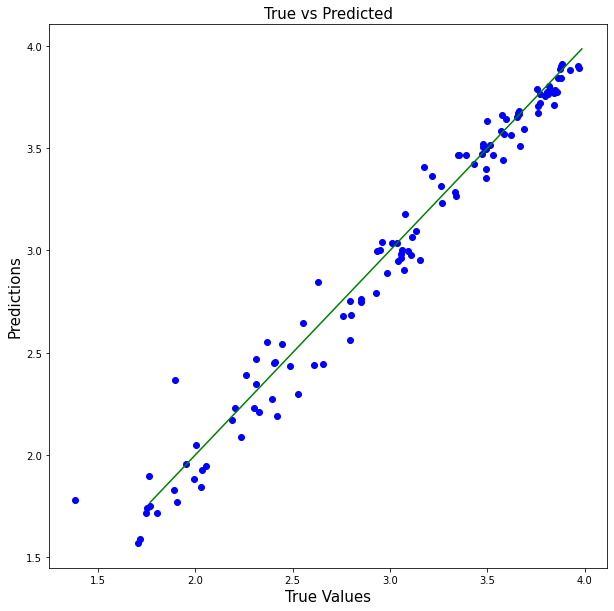

In [ ]:
# Linear regression with third year courses rows eliminated
LR_3_row_eliminated.fit(x_3_row_eliminated_train,y_3_row_eliminated_train)
train_score_3_row_eliminated_LR=LR_3_row_eliminated.score(x_3_row_eliminated_train,y_3_row_eliminated_train)
test_score_3_row_eliminated_LR=LR_3_row_eliminated.score(x_3_row_eliminated_test,y_3_row_eliminated_test)
y_3_row_eliminated_predict_LR=LR_3_row_eliminated.predict(x_3_row_eliminated_test)
r2_scr_3_row_eliminated_LR=r2_score(y_3_row_eliminated_test,y_3_row_eliminated_predict_LR)
adj_r2_3_row_eliminated_LR = 1 - ((1 - r2_scr_3_row_eliminated_LR) * (len(x_third_year_rows_eliminated) - 1) / (len(x_third_year_rows_eliminated) - len(x_third_year_rows_eliminated.columns) - 1))
mse_3_row_eliminated_LR=mean_squared_error(y_3_row_eliminated_test, y_3_row_eliminated_predict_LR)
mae_3_row_eliminated_LR=mean_absolute_error(y_3_row_eliminated_test, y_3_row_eliminated_predict_LR)
print("<","="*100,">")
print("<","="*40,"Linear Regression on Third Year data, NaN rows eliminated","="*40,">")
print("<","="*100,">")
print("Coefficient of linear regression are:",LR_3_row_eliminated.coef_)
print("Intercept of linear regression is:",LR_3_row_eliminated.intercept_)
print("Training score of Linear Regression with third courses is:",train_score_3_row_eliminated_LR*100,"%")
print("Test score of Linear Regression with third year courses is:",test_score_3_row_eliminated_LR*100,"%")
print("R2 Metric of Linear Regression with third year courses is:",r2_scr_3_row_eliminated_LR*100,"%")
print("Adjusted-R2 of Linear Regression with third year courses is:",adj_r2_3_row_eliminated_LR*100,"%")
print("Mean Squared Error of Linear Regression with third year courses is: ",mse_3_row_eliminated_LR*100,"%")
print("Mean Absolute Error of Linear Regression with third year courses is: ",mae_3_row_eliminated_LR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_3_mode_test,y_3_mode_predict_LR,c='Blue')
p1 = max(max(y_3_row_eliminated_predict_LR), max(y_3_row_eliminated_test))
p2 = min(min(y_3_row_eliminated_predict_LR), min(y_3_row_eliminated_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Random Forest on First Year data, NaN rows eliminated ======================================== >
< ==================================================================================================== >
Training score of Random Forest with first courses is: 96.282789623342 %
Test score of Random Forest with first year courses is: 84.56821640732839 %
R2 Metric of Random Forest with first year courses is: 84.56821640732839 %
Adjusted-R2 of Random Forest with first year courses is: 84.25788803526369 %
Mean Squared Error of Random Forest with first year courses is:  5.2287655592974085 %
Mean Absolute Error of Random Forest with first year courses is:  18.367737138781575 %


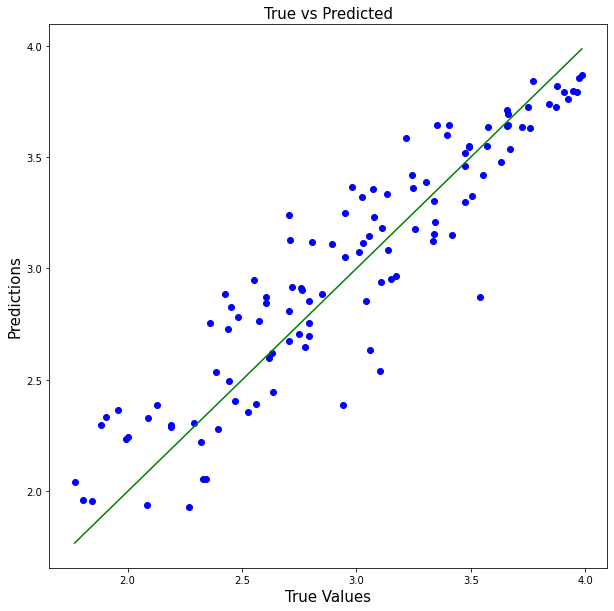

In [ ]:
# Random Forest with first year courses rows eliminated
RF_1_row_eliminated.fit(x_1_row_eliminated_train,y_1_row_eliminated_train)
train_score_1_row_eliminated_RF=RF_1_row_eliminated.score(x_1_row_eliminated_train,y_1_row_eliminated_train)
test_score_1_row_eliminated_RF=RF_1_row_eliminated.score(x_1_row_eliminated_test,y_1_row_eliminated_test)
y_1_row_eliminated_predict_RF=RF_1_row_eliminated.predict(x_1_row_eliminated_test)
r2_scr_1_row_eliminated_RF=r2_score(y_1_row_eliminated_test,y_1_row_eliminated_predict_RF)
adj_r2_1_row_eliminated_RF = 1 - ((1 - r2_scr_1_row_eliminated_RF) * (len(x_first_year_rows_eliminated) - 1) / (len(x_first_year_rows_eliminated) - len(x_first_year_rows_eliminated.columns) - 1))
mse_1_row_eliminated_RF=mean_squared_error(y_1_row_eliminated_test, y_1_row_eliminated_predict_RF)
mae_1_row_eliminated_RF=mean_absolute_error(y_1_row_eliminated_test, y_1_row_eliminated_predict_RF)
print("<","="*100,">")
print("<","="*40,"Random Forest on First Year data, NaN rows eliminated","="*40,">")
print("<","="*100,">")
print("Training score of Random Forest with first courses is:",train_score_1_row_eliminated_RF*100,"%")
print("Test score of Random Forest with first year courses is:",test_score_1_row_eliminated_RF*100,"%")
print("R2 Metric of Random Forest with first year courses is:",r2_scr_1_row_eliminated_RF*100,"%")
print("Adjusted-R2 of Random Forest with first year courses is:",adj_r2_1_row_eliminated_RF*100,"%")
print("Mean Squared Error of Random Forest with first year courses is: ",mse_1_row_eliminated_RF*100,"%")
print("Mean Absolute Error of Random Forest with first year courses is: ",mae_1_row_eliminated_RF*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_1_row_eliminated_test,y_1_row_eliminated_predict_RF,c='Blue')
p1 = max(max(y_1_row_eliminated_predict_RF), max(y_1_row_eliminated_test))
p2 = min(min(y_1_row_eliminated_predict_RF), min(y_1_row_eliminated_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Random Forest on Second Year data, NaN rows eliminated ======================================== >
< ==================================================================================================== >
Training score of Random Forest with second courses is: 98.59183034780281 %
Test score of Random Forest with second year courses is: 91.48914031013784 %
R2 Metric of Random Forest with second year courses is: 91.48914031013784 %
Adjusted-R2 of Random Forest with second year courses is: 91.13981397958379 %
Mean Squared Error of Random Forest with second year courses is:  2.8837424889432155 %
Mean Absolute Error of Random Forest with second year courses is:  12.878358799050144 %


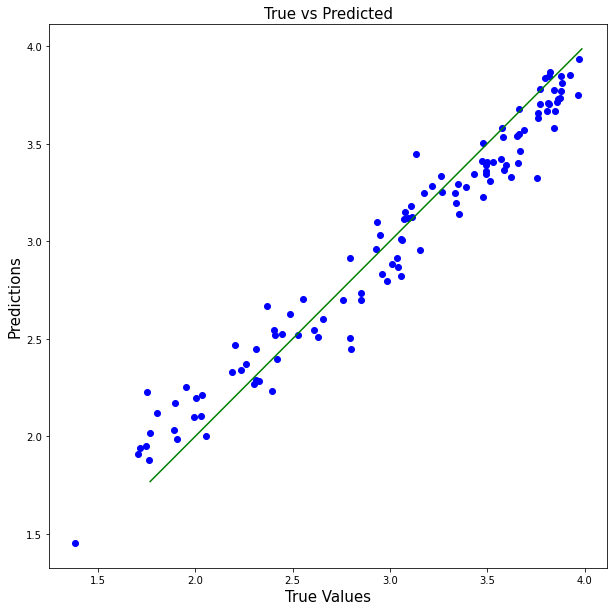

In [ ]:
# Random Forest with second year courses rows eliminated
RF_2_row_eliminated.fit(x_2_row_eliminated_train,y_2_row_eliminated_train)
train_score_2_row_eliminated_RF=RF_2_row_eliminated.score(x_2_row_eliminated_train,y_2_row_eliminated_train)
test_score_2_row_eliminated_RF=RF_2_row_eliminated.score(x_2_row_eliminated_test,y_2_row_eliminated_test)
y_2_row_eliminated_predict_RF=RF_2_row_eliminated.predict(x_2_row_eliminated_test)
r2_scr_2_row_eliminated_RF=r2_score(y_2_row_eliminated_test,y_2_row_eliminated_predict_RF)
adj_r2_2_row_eliminated_RF = 1 - ((1 - r2_scr_2_row_eliminated_RF) * (len(x_second_year_rows_eliminated) - 1) / (len(x_second_year_rows_eliminated) - len(x_second_year_rows_eliminated.columns) - 1))
mse_2_row_eliminated_RF=mean_squared_error(y_2_row_eliminated_test, y_2_row_eliminated_predict_RF)
mae_2_row_eliminated_RF=mean_absolute_error(y_2_row_eliminated_test, y_2_row_eliminated_predict_RF)
print("<","="*100,">")
print("<","="*40,"Random Forest on Second Year data, NaN rows eliminated","="*40,">")
print("<","="*100,">")
print("Training score of Random Forest with second courses is:",train_score_2_row_eliminated_RF*100,"%")
print("Test score of Random Forest with second year courses is:",test_score_2_row_eliminated_RF*100,"%")
print("R2 Metric of Random Forest with second year courses is:",r2_scr_2_row_eliminated_RF*100,"%")
print("Adjusted-R2 of Random Forest with second year courses is:",adj_r2_2_row_eliminated_RF*100,"%")
print("Mean Squared Error of Random Forest with second year courses is: ",mse_2_row_eliminated_RF*100,"%")
print("Mean Absolute Error of Random Forest with second year courses is: ",mae_2_row_eliminated_RF*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_2_mode_test,y_2_mode_predict_RF,c='Blue')
p1 = max(max(y_2_row_eliminated_predict_RF), max(y_2_row_eliminated_test))
p2 = min(min(y_2_row_eliminated_predict_RF), min(y_2_row_eliminated_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Random Forest on Third Year data, NaN rows eliminated ======================================== >
< ==================================================================================================== >
Training score of Random Forest with third courses is: 99.31890687383898 %
Test score of Random Forest with third year courses is: 94.82589655380448 %
R2 Metric of Random Forest with third year courses is: 94.82589655380448 %
Adjusted-R2 of Random Forest with third year courses is: 94.49017228439484 %
Mean Squared Error of Random Forest with third year courses is:  1.7531462735491505 %
Mean Absolute Error of Random Forest with third year courses is:  9.369722826480094 %


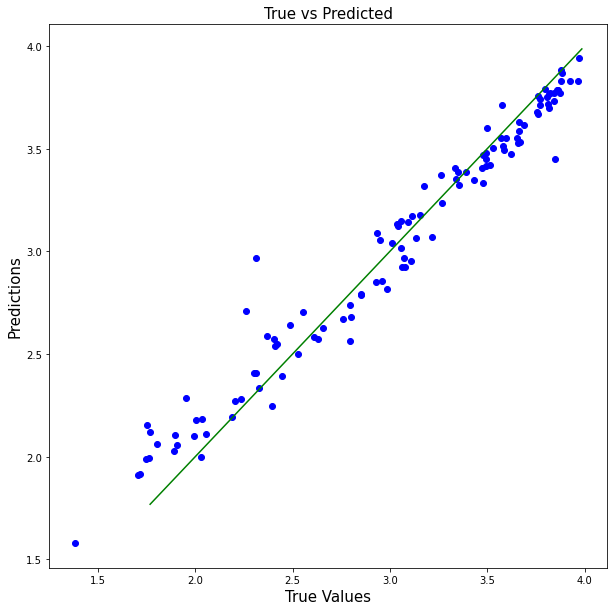

In [ ]:
# Random Forest with third year courses rows eliminated
RF_3_row_eliminated.fit(x_3_row_eliminated_train,y_3_row_eliminated_train)
train_score_3_row_eliminated_RF=RF_3_row_eliminated.score(x_3_row_eliminated_train,y_3_row_eliminated_train)
test_score_3_row_eliminated_RF=RF_3_row_eliminated.score(x_3_row_eliminated_test,y_3_row_eliminated_test)
y_3_row_eliminated_predict_RF=RF_3_row_eliminated.predict(x_3_row_eliminated_test)
r2_scr_3_row_eliminated_RF=r2_score(y_3_row_eliminated_test,y_3_row_eliminated_predict_RF)
adj_r2_3_row_eliminated_RF = 1 - ((1 - r2_scr_3_row_eliminated_RF) * (len(x_third_year_rows_eliminated) - 1) / (len(x_third_year_rows_eliminated) - len(x_third_year_rows_eliminated.columns) - 1))
mse_3_row_eliminated_RF=mean_squared_error(y_3_row_eliminated_test, y_3_row_eliminated_predict_RF)
mae_3_row_eliminated_RF=mean_absolute_error(y_3_row_eliminated_test, y_3_row_eliminated_predict_RF)
print("<","="*100,">")
print("<","="*40,"Random Forest on Third Year data, NaN rows eliminated","="*40,">")
print("<","="*100,">")
print("Training score of Random Forest with third courses is:",train_score_3_row_eliminated_RF*100,"%")
print("Test score of Random Forest with third year courses is:",test_score_3_row_eliminated_RF*100,"%")
print("R2 Metric of Random Forest with third year courses is:",r2_scr_3_row_eliminated_RF*100,"%")
print("Adjusted-R2 of Random Forest with third year courses is:",adj_r2_3_row_eliminated_RF*100,"%")
print("Mean Squared Error of Random Forest with third year courses is: ",mse_3_row_eliminated_RF*100,"%")
print("Mean Absolute Error of Random Forest with third year courses is: ",mae_3_row_eliminated_RF*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_3_mode_test,y_3_mode_predict_RF,c='Blue')
p1 = max(max(y_3_row_eliminated_predict_RF), max(y_3_row_eliminated_test))
p2 = min(min(y_3_row_eliminated_predict_RF), min(y_3_row_eliminated_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Support Vector Regressor on First Year data, NaN rows eliminated ======================================== >
< ==================================================================================================== >
Training score of Support Vector Regressor with first courses is: 92.8866855307025 %
Test score of Support Vector Regressor with first year courses is: 85.44760681822005 %
R2 Metric of Support Vector Regressor with first year courses is: 85.44760681822005 %
Adjusted-R2 of Support Vector Regressor with first year courses is: 85.15496271401607 %
Mean Squared Error of Support Vector Regressor with first year courses is:  4.93080089007859 %
Mean Absolute Error of Support Vector Regressor with first year courses is:  18.370122939101314 %


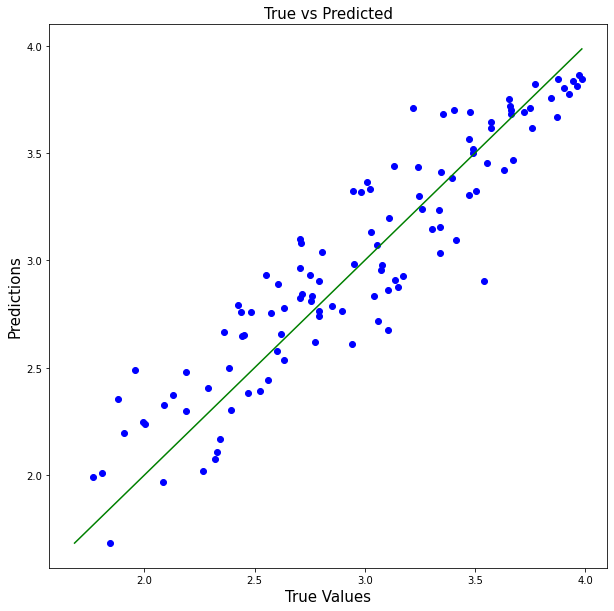

In [ ]:
# Support Vector Regressor with first year courses rows eliminated
SVR_1_row_eliminated.fit(x_1_row_eliminated_train,y_1_row_eliminated_train)
train_score_1_row_eliminated_SVR=SVR_1_row_eliminated.score(x_1_row_eliminated_train,y_1_row_eliminated_train)
test_score_1_row_eliminated_SVR=SVR_1_row_eliminated.score(x_1_row_eliminated_test,y_1_row_eliminated_test)
y_1_row_eliminated_predict_SVR=SVR_1_row_eliminated.predict(x_1_row_eliminated_test)
r2_scr_1_row_eliminated_SVR=r2_score(y_1_row_eliminated_test,y_1_row_eliminated_predict_SVR)
adj_r2_1_row_eliminated_SVR = 1 - ((1 - r2_scr_1_row_eliminated_SVR) * (len(x_first_year_rows_eliminated) - 1) / (len(x_first_year_rows_eliminated) - len(x_first_year_rows_eliminated.columns) - 1))
mse_1_row_eliminated_SVR=mean_squared_error(y_1_row_eliminated_test, y_1_row_eliminated_predict_SVR)
mae_1_row_eliminated_SVR=mean_absolute_error(y_1_row_eliminated_test, y_1_row_eliminated_predict_SVR)
print("<","="*100,">")
print("<","="*40,"Support Vector Regressor on First Year data, NaN rows eliminated","="*40,">")
print("<","="*100,">")
print("Training score of Support Vector Regressor with first courses is:",train_score_1_row_eliminated_SVR*100,"%")
print("Test score of Support Vector Regressor with first year courses is:",test_score_1_row_eliminated_SVR*100,"%")
print("R2 Metric of Support Vector Regressor with first year courses is:",r2_scr_1_row_eliminated_SVR*100,"%")
print("Adjusted-R2 of Support Vector Regressor with first year courses is:",adj_r2_1_row_eliminated_SVR*100,"%")
print("Mean Squared Error of Support Vector Regressor with first year courses is: ",mse_1_row_eliminated_SVR*100,"%")
print("Mean Absolute Error of Support Vector Regressor with first year courses is: ",mae_1_row_eliminated_SVR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_1_row_eliminated_test,y_1_row_eliminated_predict_SVR,c='Blue')
p1 = max(max(y_1_row_eliminated_predict_SVR), max(y_1_row_eliminated_test))
p2 = min(min(y_1_row_eliminated_predict_SVR), min(y_1_row_eliminated_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Support Vector Regression on Second Year data, NaN rows eliminated ======================================== >
< ==================================================================================================== >
Training score of Support Vector Regression with second courses is: 97.88204620060945 %
Test score of Support Vector Regression with second year courses is: 93.02652942371078 %
R2 Metric of Support Vector Regression with second year courses is: 93.02652942371078 %
Adjusted-R2 of Support Vector Regression with second year courses is: 92.74030488513174 %
Mean Squared Error of Support Vector Regression with second year courses is:  2.362827508505928 %
Mean Absolute Error of Support Vector Regression with second year courses is:  11.52715697827543 %


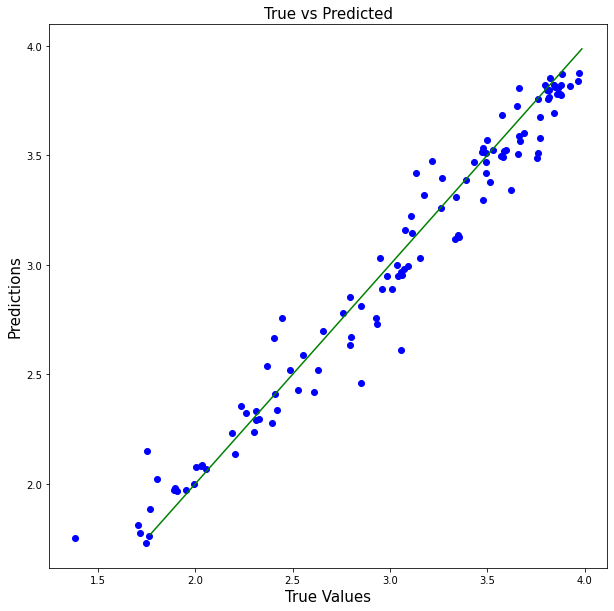

In [ ]:
# Support Vector Regression with second year courses rows eliminated
SVR_2_row_eliminated.fit(x_2_row_eliminated_train,y_2_row_eliminated_train)
train_score_2_row_eliminated_SVR=SVR_2_row_eliminated.score(x_2_row_eliminated_train,y_2_row_eliminated_train)
test_score_2_row_eliminated_SVR=SVR_2_row_eliminated.score(x_2_row_eliminated_test,y_2_row_eliminated_test)
y_2_row_eliminated_predict_SVR=SVR_2_row_eliminated.predict(x_2_row_eliminated_test)
r2_scr_2_row_eliminated_SVR=r2_score(y_2_row_eliminated_test,y_2_row_eliminated_predict_SVR)
adj_r2_2_row_eliminated_SVR = 1 - ((1 - r2_scr_2_row_eliminated_SVR) * (len(x_second_year_rows_eliminated) - 1) / (len(x_second_year_rows_eliminated) - len(x_second_year_rows_eliminated.columns) - 1))
mse_2_row_eliminated_SVR=mean_squared_error(y_2_row_eliminated_test, y_2_row_eliminated_predict_SVR)
mae_2_row_eliminated_SVR=mean_absolute_error(y_2_row_eliminated_test, y_2_row_eliminated_predict_SVR)
print("<","="*100,">")
print("<","="*40,"Support Vector Regression on Second Year data, NaN rows eliminated","="*40,">")
print("<","="*100,">")
print("Training score of Support Vector Regression with second courses is:",train_score_2_row_eliminated_SVR*100,"%")
print("Test score of Support Vector Regression with second year courses is:",test_score_2_row_eliminated_SVR*100,"%")
print("R2 Metric of Support Vector Regression with second year courses is:",r2_scr_2_row_eliminated_SVR*100,"%")
print("Adjusted-R2 of Support Vector Regression with second year courses is:",adj_r2_2_row_eliminated_SVR*100,"%")
print("Mean Squared Error of Support Vector Regression with second year courses is: ",mse_2_row_eliminated_SVR*100,"%")
print("Mean Absolute Error of Support Vector Regression with second year courses is: ",mae_2_row_eliminated_SVR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_2_mode_test,y_2_mode_predict_SVR,c='Blue')
p1 = max(max(y_2_row_eliminated_predict_SVR), max(y_2_row_eliminated_test))
p2 = min(min(y_2_row_eliminated_predict_SVR), min(y_2_row_eliminated_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

< ==================================================================================================== >
< ======================================== Support Vector Regression on third Year data, NaN rows eliminated ======================================== >
< ==================================================================================================== >
Training score of Support Vector Regression with third courses is: 98.7225874407954 %
Test score of Support Vector Regression with third year courses is: 97.17433700753702 %
R2 Metric of Support Vector Regression with third year courses is: 97.17433700753702 %
Adjusted-R2 of Support Vector Regression with third year courses is: 96.99099246222454 %
Mean Squared Error of Support Vector Regression with third year courses is:  0.9574220146651106 %
Mean Absolute Error of Support Vector Regression with third year courses is:  7.7377967700094015 %


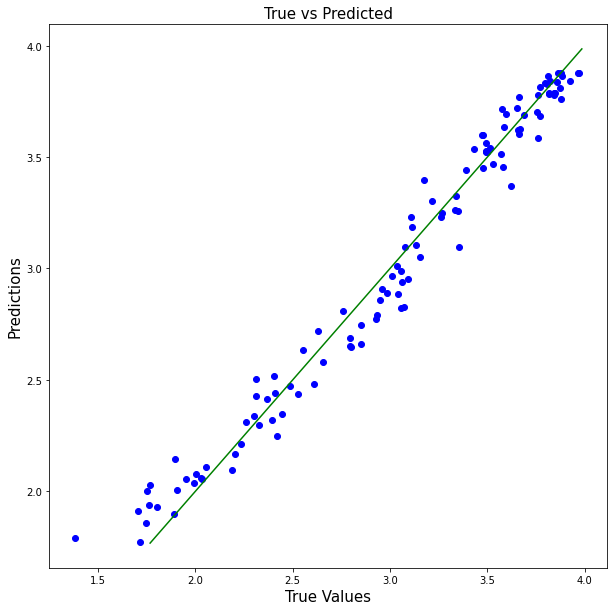

In [ ]:
# Support Vector Regression with third year courses rows eliminated
SVR_3_row_eliminated.fit(x_3_row_eliminated_train,y_3_row_eliminated_train)
train_score_3_row_eliminated_SVR=SVR_3_row_eliminated.score(x_3_row_eliminated_train,y_3_row_eliminated_train)
test_score_3_row_eliminated_SVR=SVR_3_row_eliminated.score(x_3_row_eliminated_test,y_3_row_eliminated_test)
y_3_row_eliminated_predict_SVR=SVR_3_row_eliminated.predict(x_3_row_eliminated_test)
r2_scr_3_row_eliminated_SVR=r2_score(y_3_row_eliminated_test,y_3_row_eliminated_predict_SVR)
adj_r2_3_row_eliminated_SVR = 1 - ((1 - r2_scr_3_row_eliminated_SVR) * (len(x_third_year_rows_eliminated) - 1) / (len(x_third_year_rows_eliminated) - len(x_third_year_rows_eliminated.columns) - 1))
mse_3_row_eliminated_SVR=mean_squared_error(y_3_row_eliminated_test, y_3_row_eliminated_predict_SVR)
mae_3_row_eliminated_SVR=mean_absolute_error(y_3_row_eliminated_test, y_3_row_eliminated_predict_SVR)
print("<","="*100,">")
print("<","="*40,"Support Vector Regression on third Year data, NaN rows eliminated","="*40,">")
print("<","="*100,">")
print("Training score of Support Vector Regression with third courses is:",train_score_3_row_eliminated_SVR*100,"%")
print("Test score of Support Vector Regression with third year courses is:",test_score_3_row_eliminated_SVR*100,"%")
print("R2 Metric of Support Vector Regression with third year courses is:",r2_scr_3_row_eliminated_SVR*100,"%")
print("Adjusted-R2 of Support Vector Regression with third year courses is:",adj_r2_3_row_eliminated_SVR*100,"%")
print("Mean Squared Error of Support Vector Regression with third year courses is: ",mse_3_row_eliminated_SVR*100,"%")
print("Mean Absolute Error of Support Vector Regression with third year courses is: ",mae_3_row_eliminated_SVR*100,"%")
plt.figure(figsize=(10,10))
plt.scatter(y_3_mode_test,y_3_mode_predict_SVR,c='Blue')
p1 = max(max(y_3_row_eliminated_predict_SVR), max(y_3_row_eliminated_test))
p2 = min(min(y_3_row_eliminated_predict_SVR), min(y_3_row_eliminated_test))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.title('True vs Predicted', fontsize=15)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()
#the green line made by p1 and p2 is a line that represents perfect regression. The closer the points are to the line, the more accurate the model is.
#It can also be used to understand if the model is under or over predicting. If points are above the green line,
#the model is over predicting while if the points are below the green line, the model is under predicting.

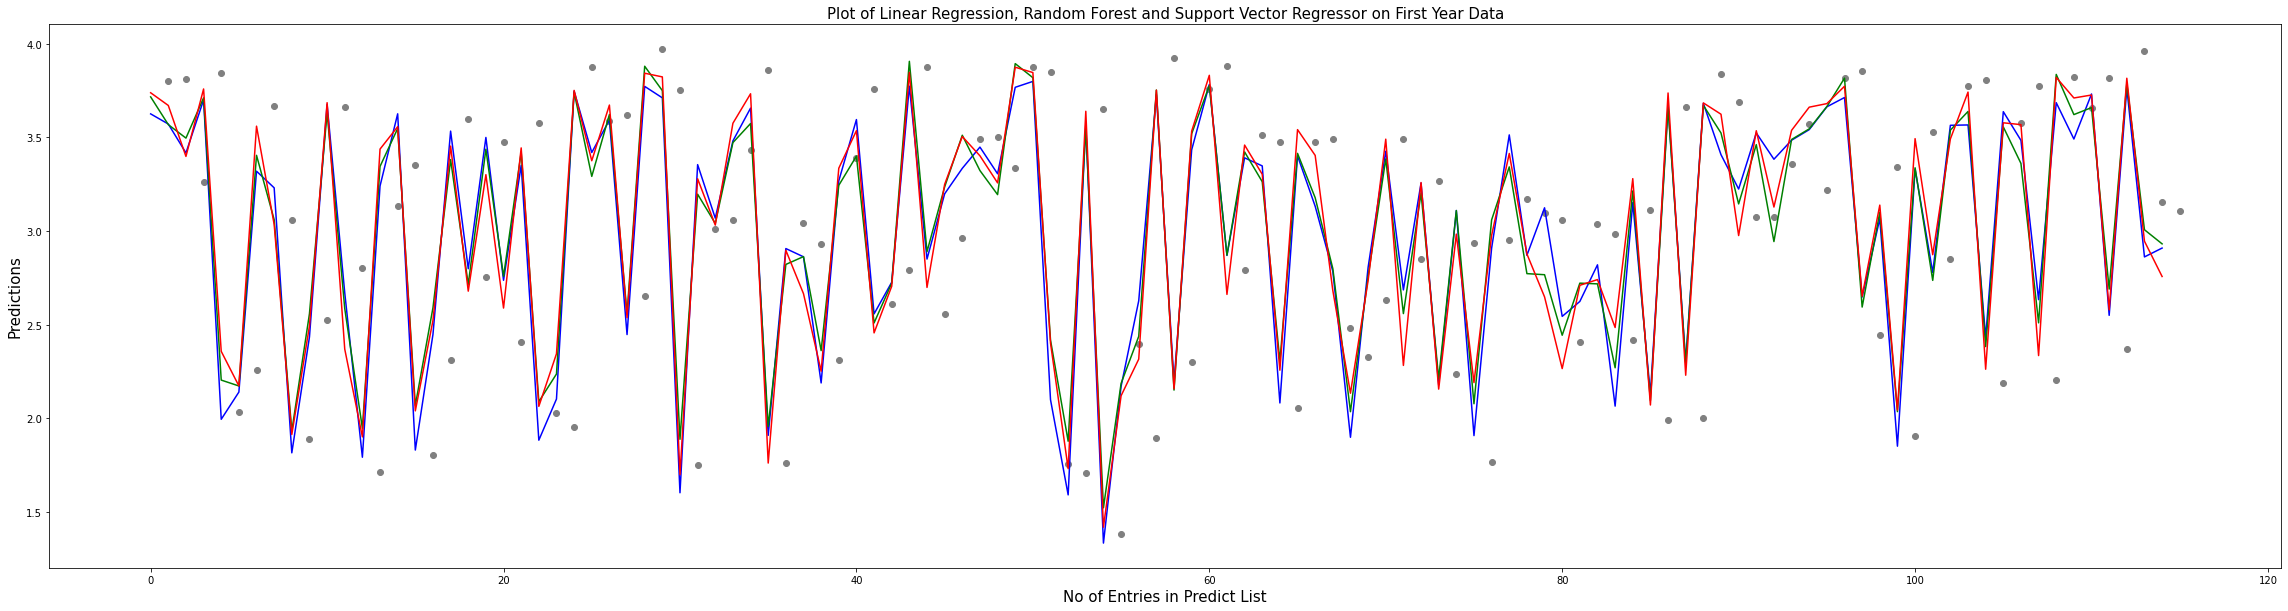

In [ ]:
# # Comparison plots of different algos applied on First Year data where columns are filled with mode 
plt.figure(figsize=(40,10))
for i,j in enumerate(y_1_mode_test): 
  plt.scatter(i+1,j,c="gray")
plt.plot(y_1_mode_predict_LR,"b-")
plt.plot(y_1_mode_predict_RF,"g-")
plt.plot(y_1_mode_predict_SVR,"r-")
plt.title("Plot of Linear Regression, Random Forest and Support Vector Regressor on First Year Data",fontsize=15)
plt.xlabel("No of Entries in Predict List",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.show()
#Conclusion: The model whose line covers/passes through maximum scattered points will be considered as the best model

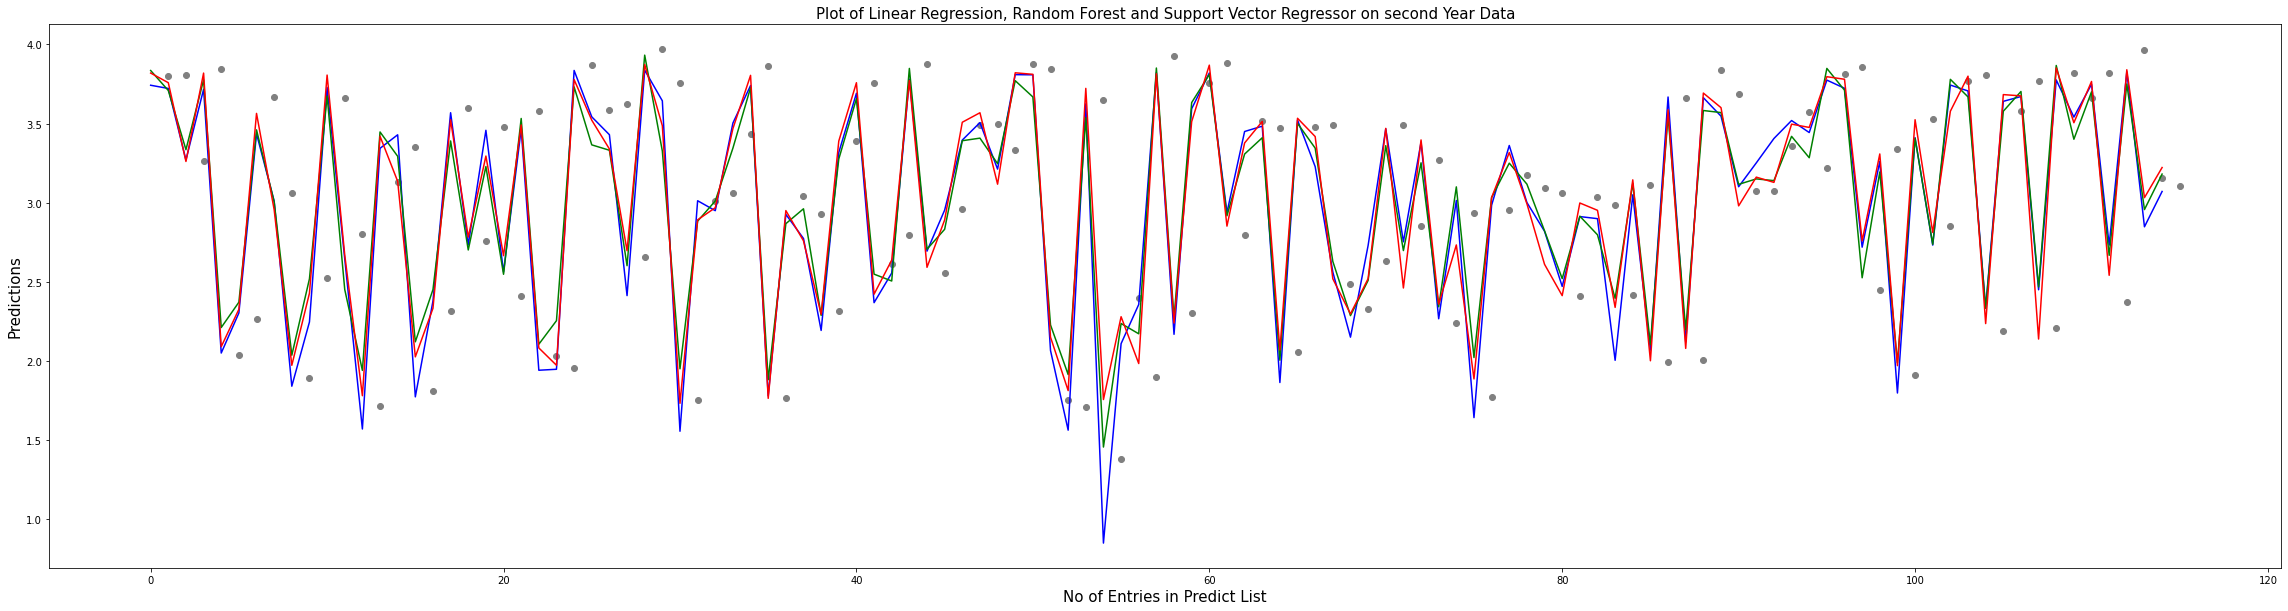

In [ ]:
# # Comparison plots of different algos applied on second Year data where columns are filled with mode 
plt.figure(figsize=(40,10))
for i,j in enumerate(y_2_mode_test): 
  plt.scatter(i+1,j,c="gray")
plt.plot(y_2_mode_predict_LR,"b-")
plt.plot(y_2_mode_predict_RF,"g-")
plt.plot(y_2_mode_predict_SVR,"r-")
plt.title("Plot of Linear Regression, Random Forest and Support Vector Regressor on second Year Data",fontsize=15)
plt.xlabel("No of Entries in Predict List",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.show()
#Conclusion: The model whose line covers/passes through maximum scattered points will be considered as the best model

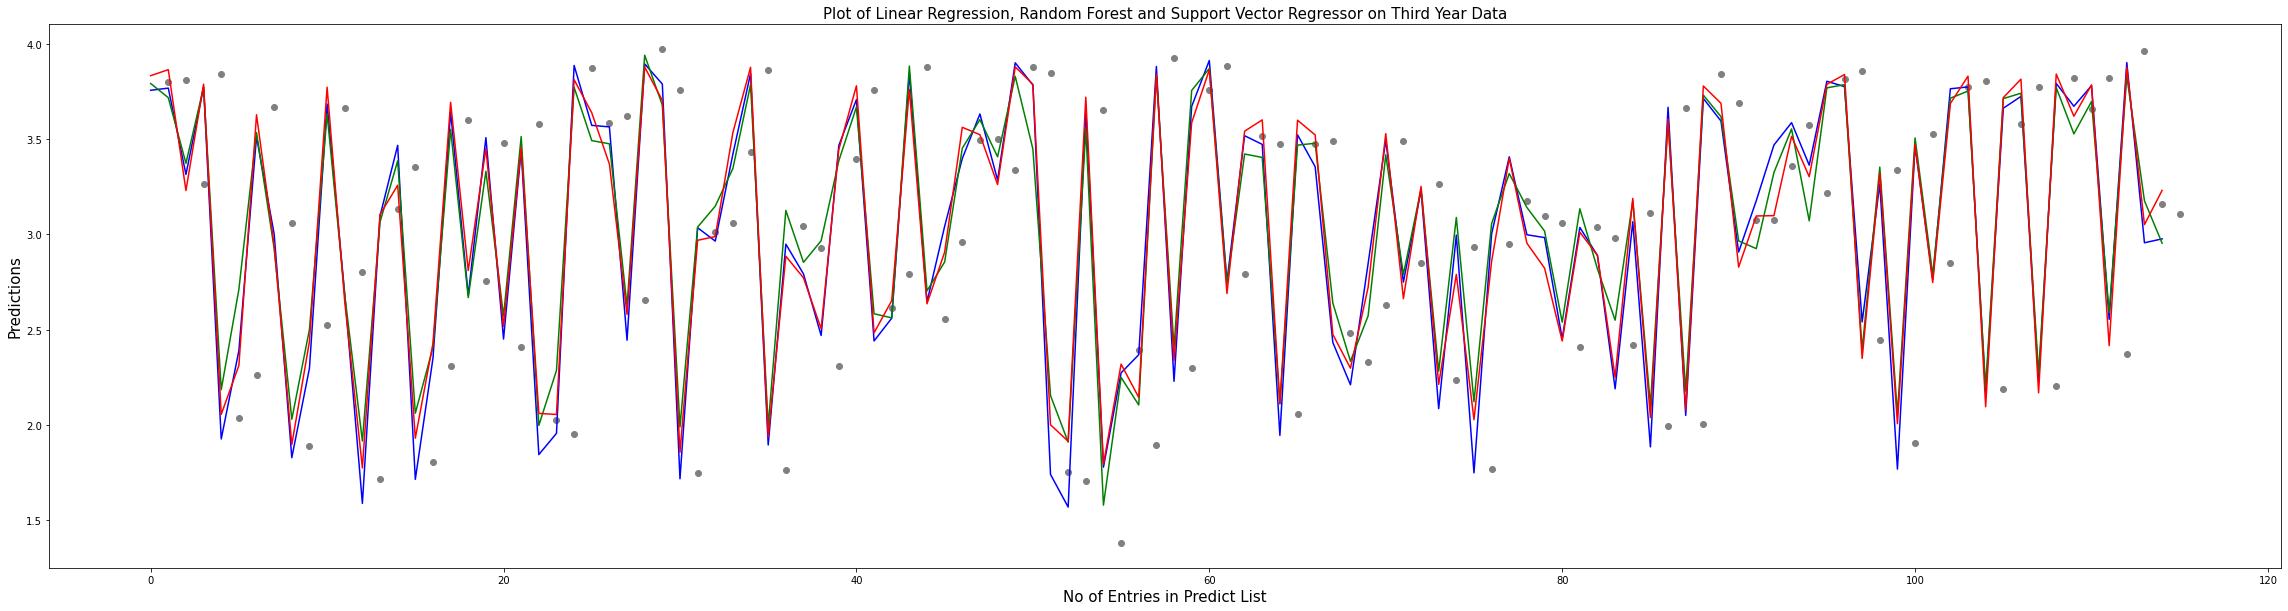

In [ ]:
# # Comparison plots of different algos applied on third Year data where columns are filled with mode 
plt.figure(figsize=(40,10))
for i,j in enumerate(y_3_mode_test): 
  plt.scatter(i+1,j,c="gray")
plt.plot(y_3_mode_predict_LR,"b-")
plt.plot(y_3_mode_predict_RF,"g-")
plt.plot(y_3_mode_predict_SVR,"r-")
plt.title("Plot of Linear Regression, Random Forest and Support Vector Regressor on Third Year Data",fontsize=15)
plt.xlabel("No of Entries in Predict List",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.show()
#Conclusion: The model whose line covers/passes through maximum scattered points will be considered as the best model

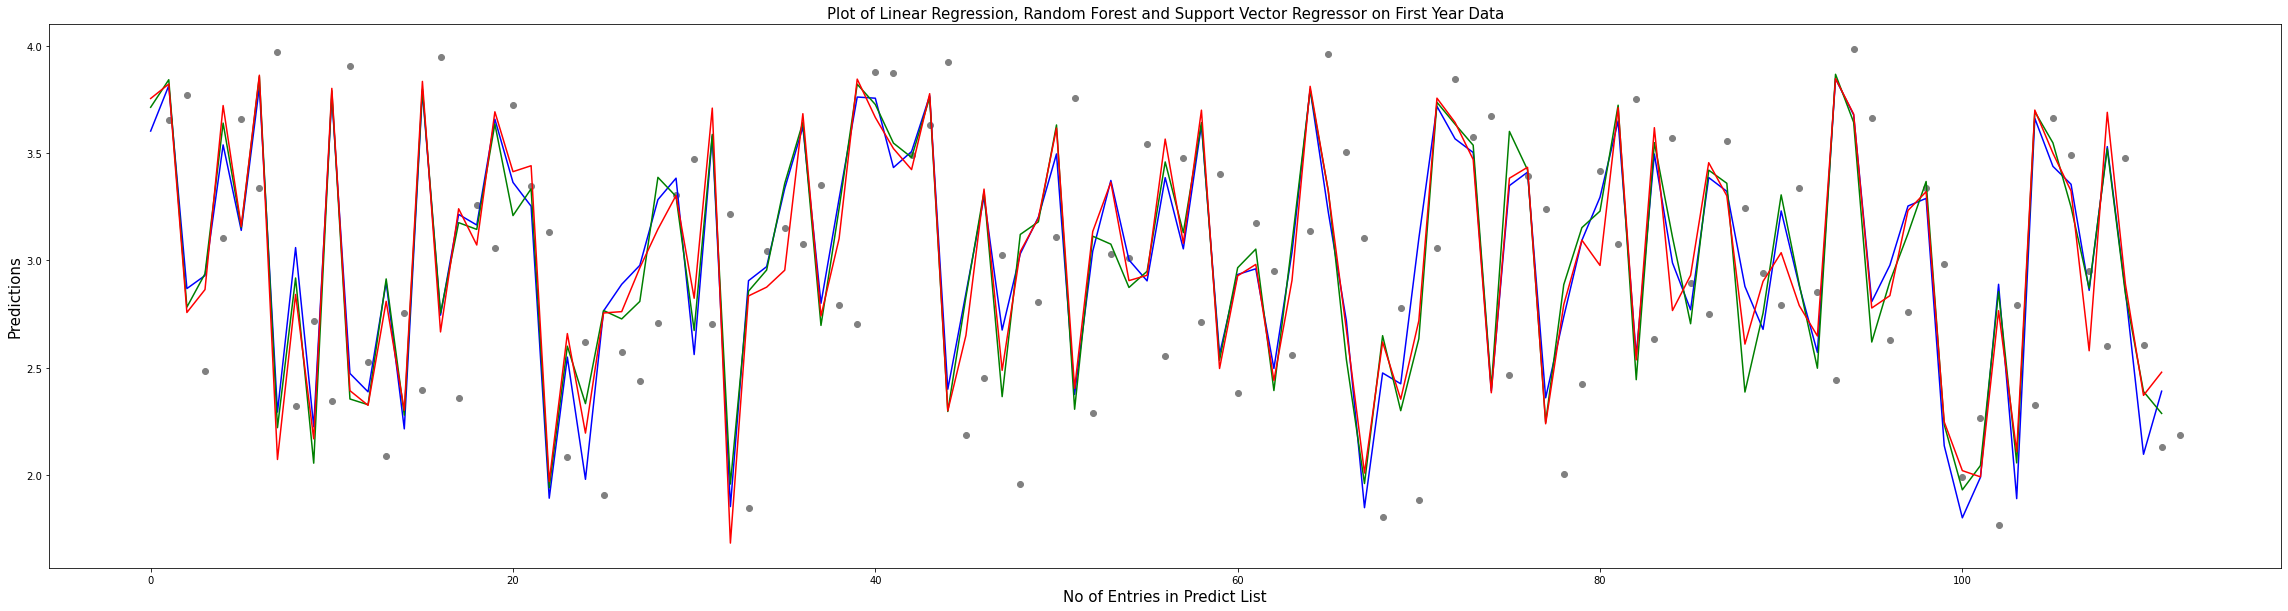

In [ ]:
# # Comparison plots of different algos applied on First Year data where row with NaN are dropped 
plt.figure(figsize=(40,10))
for i,j in enumerate(y_1_row_eliminated_test): 
  plt.scatter(i+1,j,c="gray")
plt.plot(y_1_row_eliminated_predict_LR,"b-")
plt.plot(y_1_row_eliminated_predict_RF,"g-")
plt.plot(y_1_row_eliminated_predict_SVR,"r-")
plt.title("Plot of Linear Regression, Random Forest and Support Vector Regressor on First Year Data",fontsize=15)
plt.xlabel("No of Entries in Predict List",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.show()
#Conclusion: The model whose line covers/passes through maximum scattered points will be considered as the best model

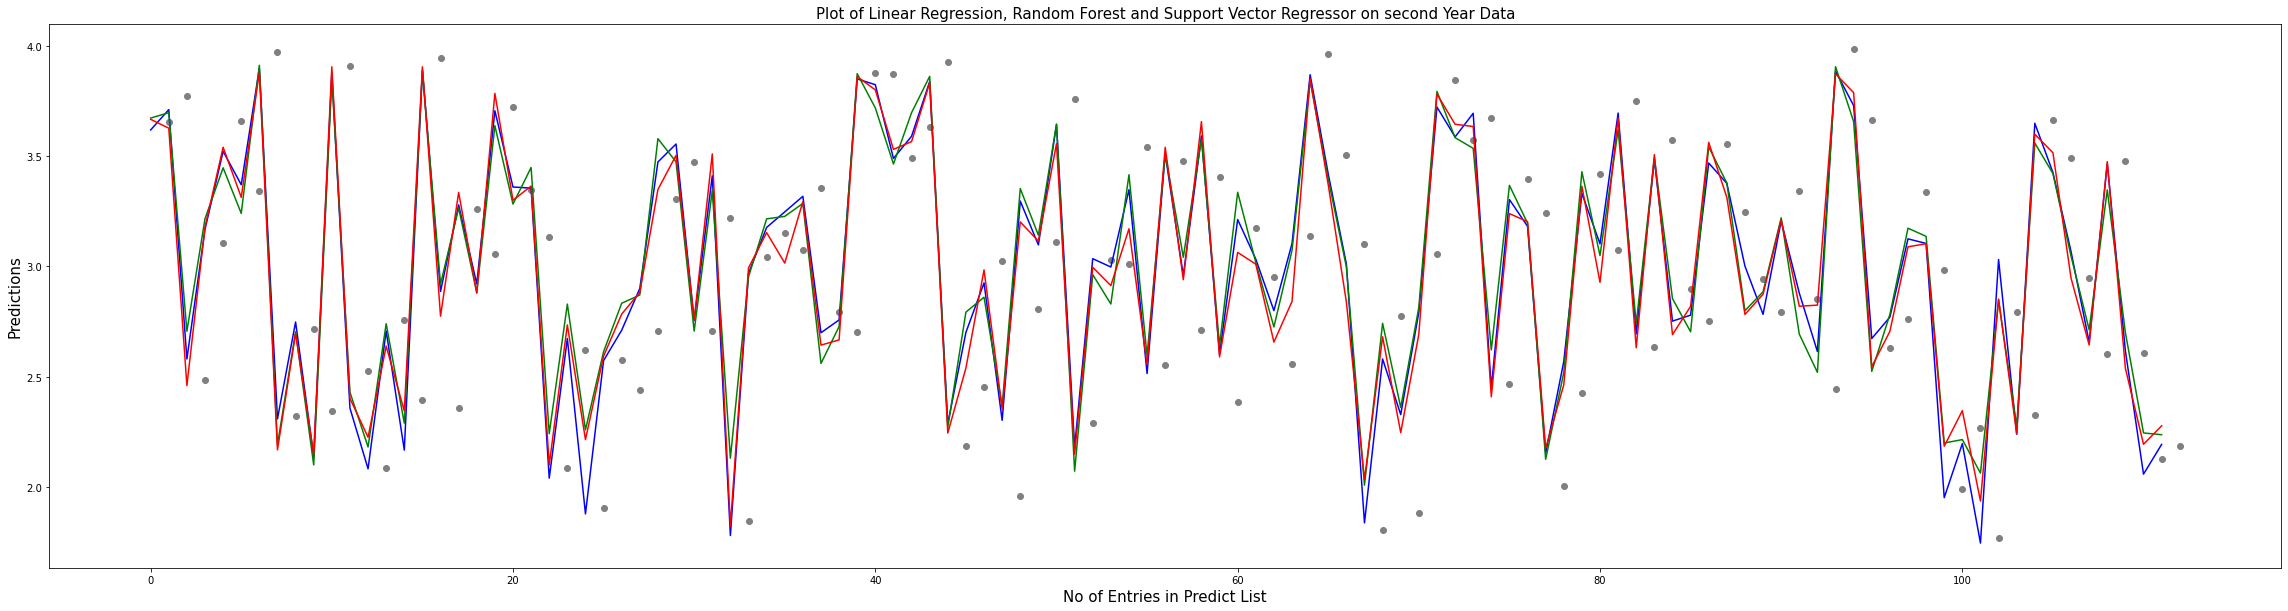

In [ ]:
# # Comparison plots of different algos applied on second Year data where row with NaN are dropped 
plt.figure(figsize=(40,10))
for i,j in enumerate(y_2_row_eliminated_test): 
  plt.scatter(i+1,j,c="gray")
plt.plot(y_2_row_eliminated_predict_LR,"b-")
plt.plot(y_2_row_eliminated_predict_RF,"g-")
plt.plot(y_2_row_eliminated_predict_SVR,"r-")
plt.title("Plot of Linear Regression, Random Forest and Support Vector Regressor on second Year Data",fontsize=15)
plt.xlabel("No of Entries in Predict List",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.show()
#Conclusion: The model whose line covers/passes through maximum scattered points will be considered as the best model

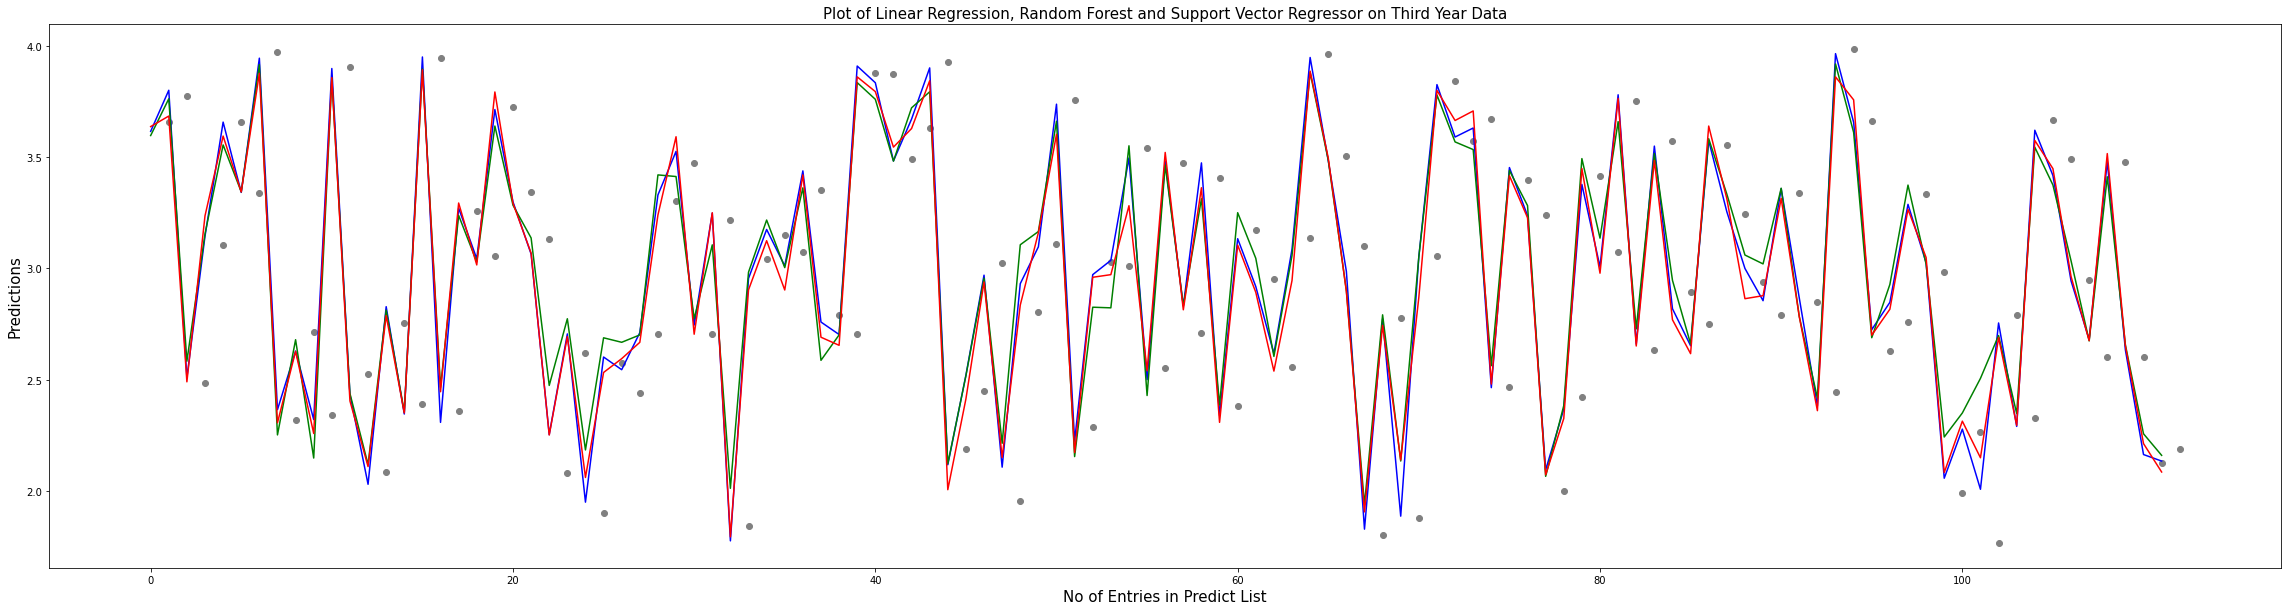

In [ ]:
# # Comparison plots of different algos applied on third Year data where row with NaN are dropped 
plt.figure(figsize=(40,10))
for i,j in enumerate(y_3_row_eliminated_test): 
  plt.scatter(i+1,j,c="gray")
plt.plot(y_3_row_eliminated_predict_LR,"b-")
plt.plot(y_3_row_eliminated_predict_RF,"g-")
plt.plot(y_3_row_eliminated_predict_SVR,"r-")
plt.title("Plot of Linear Regression, Random Forest and Support Vector Regressor on Third Year Data",fontsize=15)
plt.xlabel("No of Entries in Predict List",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.show()
#Conclusion: The model whose line covers/passes through maximum scattered points will be considered as the best model

# **Predictor Method Used in Interface**

In [ ]:
# This is method will be used for prediction. It will return a tuple of length 6 containing predictions. Since we have 6 models for each years.
def predictor(model1,model2,model3,model4,model5,model6,course_list):
  input_predict_list=[]
  for i in course_list:
    temp_input=input(f"Enter grade of {i}: ")
    temp_input=temp_input.upper()
    if temp_input in grades:
      input_predict_list.append(temp_input)
    else:
      temp_input=input(f"Enter grade of {i}: ") # if somehow user entered grade not be a part of grade list he/she will be asked to enter it again once
      temp_input=temp_input.upper()
      input_predict_list.append(temp_input)
  input_predict_list=[input_predict_list]
  input_predict_list=pd.DataFrame(input_predict_list)
  input_predict_list.replace(grade_margin,inplace=True)
  return model1.predict(input_predict_list),model2.predict(input_predict_list),model3.predict(input_predict_list),model4.predict(input_predict_list),model5.predict(input_predict_list),model6.predict(input_predict_list)

# **User Interface Code:**

In [ ]:
# This is the interface. It will show results of all 6 models designed for each year
def Interface():
  print("<","="*106,">")
  print("<","="*40,"Wellcome To CGPA Predictor","="*40,">")
  print("<","="*106,">")
  while(1):
    print("\n \n")
    print("We have a total of 2 datasets \n 1.) Dataset in which NaN values are filled with column mode \n 2.) Dataset in which rows with NaN values are dropped \nFor each dataset we have applied 3 algorithms and from each dataset we have made predictions using 1st year, 2nd year and 3rd year data. So, we have a total of 18 Predictive models")
    print("Choose your prediction criteria (only select year it will make predictions with all the models and it will automatically tell you about train, test scores and errors etc...)")
    print("1.) First Year \n2.) Second Year \n3.) Third Year \n4.) Exit")
    choice=input("Enter your choice: ")
    if(choice=='1'):
      m1,m2,m3,m4,m5,m6=predictor(LR_1,RF_1,SVR_1,LR_1_row_eliminated,RF_1_row_eliminated,SVR_1_row_eliminated,first_year_courses)
      print("<","="*40,"Linear Regression First Year (column mode)","="*40,">")
      print("CGPA is:",m1)
      print("Note: This Model has")
      print("Training score:",train_score_1_mode_LR*100,"%")
      print("Test score:",test_score_1_mode_LR*100,"%")
      print("R2 Metric:",r2_scr_1_mode_LR*100,"%")
      print("Adjusted-R2:",adj_r2_1_mode_LR*100,"%")
      print("Mean Squared Error: ",mse_1_mode_LR*100,"%")
      print("Mean Absolute Error: ",mae_1_mode_LR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Random Forest First Year (column mode)","="*40,">")
      print("CGPA is:",m2)
      print("Note: This Model has")
      print("Training score:",train_score_1_mode_RF*100,"%")
      print("Test score:",test_score_1_mode_RF*100,"%")
      print("R2 Metric:",r2_scr_1_mode_RF*100,"%")
      print("Adjusted-R2:",adj_r2_1_mode_RF*100,"%")
      print("Mean Squared Error: ",mse_1_mode_RF*100,"%")
      print("Mean Absolute Error: ",mae_1_mode_RF*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Support Vector Regressor First Year (column mode)","="*40,">")
      print("CGPA is:",m3)
      print("Note: This Model has")
      print("Training score:",train_score_1_mode_SVR*100,"%")
      print("Test score:",test_score_1_mode_SVR*100,"%")
      print("R2 Metric:",r2_scr_1_mode_SVR*100,"%")
      print("Adjusted-R2:",adj_r2_1_mode_SVR*100,"%")
      print("Mean Squared Error: ",mse_1_mode_SVR*100,"%")
      print("Mean Absolute Error: ",mae_1_mode_SVR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Linear Regression First Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",m4)
      print("Note: This Model has")
      print("Training score:",train_score_1_row_eliminated_LR*100,"%")
      print("Test score:",test_score_1_row_eliminated_LR*100,"%")
      print("R2 Metric:",r2_scr_1_row_eliminated_LR*100,"%")
      print("Adjusted-R2:",adj_r2_1_row_eliminated_LR*100,"%")
      print("Mean Squared Error: ",mse_1_row_eliminated_LR*100,"%")
      print("Mean Absolute Error: ",mae_1_row_eliminated_LR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Linear Regression First Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",m4)
      print("Note: This Model has")
      print("Training score:",train_score_1_row_eliminated_LR*100,"%")
      print("Test score:",test_score_1_row_eliminated_LR*100,"%")
      print("R2 Metric:",r2_scr_1_row_eliminated_LR*100,"%")
      print("Adjusted-R2:",adj_r2_1_row_eliminated_LR*100,"%")
      print("Mean Squared Error: ",mse_1_row_eliminated_LR*100,"%")
      print("Mean Absolute Error: ",mae_1_row_eliminated_LR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Random Forest First Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",m5)
      print("Note: This Model has")
      print("Training score:",train_score_1_row_eliminated_RF*100,"%")
      print("Test score:",test_score_1_row_eliminated_RF*100,"%")
      print("R2 Metric:",r2_scr_1_row_eliminated_RF*100,"%")
      print("Adjusted-R2:",adj_r2_1_row_eliminated_RF*100,"%")
      print("Mean Squared Error: ",mse_1_row_eliminated_RF*100,"%")
      print("Mean Absolute Error: ",mae_1_row_eliminated_RF*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Support Vector Regressor First Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",m6)
      print("Note: This Model has")
      print("Training score:",train_score_1_row_eliminated_SVR*100,"%")
      print("Test score:",test_score_1_row_eliminated_SVR*100,"%")
      print("R2 Metric:",r2_scr_1_row_eliminated_SVR*100,"%")
      print("Adjusted-R2:",adj_r2_1_row_eliminated_SVR*100,"%")
      print("Mean Squared Error: ",mse_1_row_eliminated_SVR*100,"%")
      print("Mean Absolute Error: ",mae_1_row_eliminated_SVR*100,"%")
      print("<","="*80,">")
    elif(choice=='2'):
      a1,a2,a3,a4,a5,a6=predictor(LR_2,RF_2,SVR_2,LR_2_row_eliminated,RF_2_row_eliminated,SVR_2_row_eliminated,second_year_courses)
      print("<","="*40,"Linear Regression Second Year (column mode)","="*40,">")
      print("CGPA is:",a1)
      print("Note: This Model has")
      print("Training score:",train_score_2_mode_LR*100,"%")
      print("Test score:",test_score_2_mode_LR*100,"%")
      print("R2 Metric:",r2_scr_2_mode_LR*100,"%")
      print("Adjusted-R2:",adj_r2_2_mode_LR*100,"%")
      print("Mean Squared Error: ",mse_2_mode_LR*100,"%")
      print("Mean Absolute Error: ",mae_2_mode_LR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Random Forest Second Year (column mode)","="*40,">")
      print("CGPA is:",a2)
      print("Note: This Model has")
      print("Training score:",train_score_2_mode_RF*100,"%")
      print("Test score:",test_score_2_mode_RF*100,"%")
      print("R2 Metric:",r2_scr_2_mode_RF*100,"%")
      print("Adjusted-R2:",adj_r2_2_mode_RF*100,"%")
      print("Mean Squared Error: ",mse_2_mode_RF*100,"%")
      print("Mean Absolute Error: ",mae_2_mode_RF*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Support Vector Regressor Second Year (column mode)","="*40,">")
      print("CGPA is:",a3)
      print("Note: This Model has")
      print("Training score:",train_score_2_mode_SVR*100,"%")
      print("Test score:",test_score_2_mode_SVR*100,"%")
      print("R2 Metric:",r2_scr_2_mode_SVR*100,"%")
      print("Adjusted-R2:",adj_r2_2_mode_SVR*100,"%")
      print("Mean Squared Error: ",mse_2_mode_SVR*100,"%")
      print("Mean Absolute Error: ",mae_2_mode_SVR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Linear Regression Second Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",a4)
      print("Note: This Model has")
      print("Training score:",train_score_2_row_eliminated_LR*100,"%")
      print("Test score:",test_score_2_row_eliminated_LR*100,"%")
      print("R2 Metric:",r2_scr_2_row_eliminated_LR*100,"%")
      print("Adjusted-R2:",adj_r2_2_row_eliminated_LR*100,"%")
      print("Mean Squared Error: ",mse_2_row_eliminated_LR*100,"%")
      print("Mean Absolute Error: ",mae_2_row_eliminated_LR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Random Forest Second Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",a5)
      print("Note: This Model has")
      print("Training score:",train_score_2_row_eliminated_RF*100,"%")
      print("Test score:",test_score_2_row_eliminated_RF*100,"%")
      print("R2 Metric:",r2_scr_2_row_eliminated_RF*100,"%")
      print("Adjusted-R2:",adj_r2_2_row_eliminated_RF*100,"%")
      print("Mean Squared Error: ",mse_2_row_eliminated_RF*100,"%")
      print("Mean Absolute Error: ",mae_2_row_eliminated_RF*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Support Vector Regressor Second Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",a6)
      print("Note: This Model has")
      print("Training score:",train_score_2_row_eliminated_SVR*100,"%")
      print("Test score:",test_score_2_row_eliminated_SVR*100,"%")
      print("R2 Metric:",r2_scr_2_row_eliminated_SVR*100,"%")
      print("Adjusted-R2:",adj_r2_2_row_eliminated_SVR*100,"%")
      print("Mean Squared Error: ",mse_2_row_eliminated_SVR*100,"%")
      print("Mean Absolute Error: ",mae_2_row_eliminated_SVR*100,"%")
      print("<","="*80,">")
      print()
    elif(choice=='3'):
      b1,b2,b3,b4,b5,b6=predictor(LR_3,RF_3,SVR_3,LR_3_row_eliminated,RF_3_row_eliminated,SVR_3_row_eliminated,third_year_courses)
      print("<","="*40,"Linear Regression Third Year (column mode)","="*40,">")
      print("CGPA is:",b1)
      print("Note: This Model has")
      print("Training score:",train_score_3_mode_LR*100,"%")
      print("Test score:",test_score_3_mode_LR*100,"%")
      print("R2 Metric:",r2_scr_3_mode_LR*100,"%")
      print("Adjusted-R2:",adj_r2_3_mode_LR*100,"%")
      print("Mean Squared Error: ",mse_3_mode_LR*100,"%")
      print("Mean Absolute Error: ",mae_3_mode_LR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Random Forest Third Year (column mode)","="*40,">")
      print("CGPA is:",b2)
      print("Note: This Model has")
      print("Training score:",train_score_3_mode_RF*100,"%")
      print("Test score:",test_score_3_mode_RF*100,"%")
      print("R2 Metric:",r2_scr_3_mode_RF*100,"%")
      print("Adjusted-R2:",adj_r2_3_mode_RF*100,"%")
      print("Mean Squared Error: ",mse_3_mode_RF*100,"%")
      print("Mean Absolute Error: ",mae_3_mode_RF*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Support Vector Regressor Third Year (column mode)","="*40,">")
      print("CGPA is:",b3)
      print("Note: This Model has")
      print("Training score:",train_score_3_mode_SVR*100,"%")
      print("Test score:",test_score_3_mode_SVR*100,"%")
      print("R2 Metric:",r2_scr_3_mode_SVR*100,"%")
      print("Adjusted-R2:",adj_r2_3_mode_SVR*100,"%")
      print("Mean Squared Error: ",mse_3_mode_SVR*100,"%")
      print("Mean Absolute Error: ",mae_3_mode_SVR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Linear Regression Third Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",b4)
      print("Note: This Model has")
      print("Training score:",train_score_3_row_eliminated_LR*100,"%")
      print("Test score:",test_score_3_row_eliminated_LR*100,"%")
      print("R2 Metric:",r2_scr_3_row_eliminated_LR*100,"%")
      print("Adjusted-R2:",adj_r2_3_row_eliminated_LR*100,"%")
      print("Mean Squared Error: ",mse_3_row_eliminated_LR*100,"%")
      print("Mean Absolute Error: ",mae_3_row_eliminated_LR*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Random Forest Third Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",b5)
      print("Note: This Model has")
      print("Training score:",train_score_3_row_eliminated_RF*100,"%")
      print("Test score:",test_score_3_row_eliminated_RF*100,"%")
      print("R2 Metric:",r2_scr_3_row_eliminated_RF*100,"%")
      print("Adjusted-R2:",adj_r2_3_row_eliminated_RF*100,"%")
      print("Mean Squared Error: ",mse_3_row_eliminated_RF*100,"%")
      print("Mean Absolute Error: ",mae_3_row_eliminated_RF*100,"%")
      print("<","="*80,">")
      print("<","="*40,"Support Vector Regressor Third Year (Rows Eliminated)","="*40,">")
      print("CGPA is:",b6)
      print("Note: This Model has")
      print("Training score:",train_score_3_row_eliminated_SVR*100,"%")
      print("Test score:",test_score_3_row_eliminated_SVR*100,"%")
      print("R2 Metric:",r2_scr_3_row_eliminated_SVR*100,"%")
      print("Adjusted-R2:",adj_r2_3_row_eliminated_SVR*100,"%")
      print("Mean Squared Error: ",mse_3_row_eliminated_SVR*100,"%")
      print("Mean Absolute Error: ",mae_3_row_eliminated_SVR*100,"%")
      print("<","="*80,">")
      print()
    elif(choice=='4'):
      break
    else:
      choice=input("Enter your choice: ")

# **User Interface**

In [ ]:
# Interface
Interface()